# EJERCICIO DESPLIGUE REINA ROJA

Estimado candidat@:



Mi nombre es Ian Notanai, recruiter especializado. Como ya sabrá, JGJ Deployments es una empresa puntera en la evaluación de proyectos estratégicos de todo tipo. Nuestro valor diferencial reside en la especial utilización que hacemos de la IA. La empleamos con sentido común y conocimiento de dominio. El siguiente ejercicio, ficticio, lo denominamos Despliegue Reina Roja y aunque sencillo nos sirve para valorar no sólo su capacidad como Data Science sino también como posible nuevo miembro de JGJ Deployments. Por favor, lea con atención las instrucciones y danos tu mejor respuesta. ¡¡¡¡Queremos contar contigo!!!!





## PARTE I. Despliegues Secretos

Uno de nuestros clientes quiere evaluar el despliegue de una central de operaciones terrestre "secreta" y tiene tres posibles candidatos. Nos ha pedido que le asesoremos en cuestiones de coste de despliegue. Para cumplir con el trabajo, hemos recabado información de diversa índole y de diferentes fuentes. Podrá encontrar dicha información en el archivo "cost_report_tabular_data_incomplete.csv". 


Cargue los datos y haga un pequeño análisis de los mismos.

In [1]:
#importamos las librerías que vamos a necesitar
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
#cargamos los datos y visualizamos el dataset
df=pd.read_csv("cost_report_tabular_data_incomplete.csv")
df

,Longitud,Latitud,terreno,terreno_N,terreno_S,terreno_E,terreno_O,Lluvia_Resto,Lluvia_Mar_May,LLuvia_Oct_Nov,dist_hospital,dist_tren,dist_ciudad,Coste
0,35.347780,-1.593941,Cultivado,Cultivado,Agreste,Carretera,Agreste,0.250916,0.999580,0.600921,1.892663,2.257045,1.281761,144.927625
1,35.274718,-2.128360,Desconocido,Agreste,Agreste,Agreste,Urbano,0.010000,0.749380,0.350227,1.885200,1.677860,1.709584,193.461542
2,36.030929,1.062174,Agreste,Agreste,Agreste,Cultivado,Cultivado,0.010000,0.150591,0.049412,2.587089,3.907629,3.831873,102.201901
3,35.087122,-1.211366,Carretera,Agreste,Cultivado,Carretera,Agreste,0.200438,0.950053,0.550830,1.765222,3.582352,1.748631,169.914993
4,36.309860,-1.415638,Urbano,Cultivado,Urbano,Urbano,Cultivado,0.099640,0.799804,0.400229,0.216173,0.173463,0.207680,279.071391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,35.747793,-1.681080,Desconocido,Urbano,Urbano,Carretera,Cultivado,0.010000,0.650600,0.249931,0.567801,0.108110,0.290156,374.629031
1415,39.626994,-3.532354,Cultivado,Urbano,Carretera,Urbano,Cultivado,0.250122,0.949946,0.699040,3.086857,3.081889,3.211819,199.917828
1416,35.217659,-0.546574,Cultivado,Agreste,Urbano,Agreste,Agreste,0.249529,1.000530,0.599357,3.027005,3.425071,3.538944,123.203869
1417,36.987751,-1.811772,Desconocido,Cultivado,Desconocido,Urbano,Cultivado,0.010000,0.649084,0.250453,0.978724,0.668669,0.586025,294.621874


In [3]:
#visualizamod las 5 primeras lineas
df.head()

,Longitud,Latitud,terreno,terreno_N,terreno_S,terreno_E,terreno_O,Lluvia_Resto,Lluvia_Mar_May,LLuvia_Oct_Nov,dist_hospital,dist_tren,dist_ciudad,Coste
0,35.347780,-1.593941,Cultivado,Cultivado,Agreste,Carretera,Agreste,0.250916,0.999580,0.600921,1.892663,2.257045,1.281761,144.927625
1,35.274718,-2.128360,Desconocido,Agreste,Agreste,Agreste,Urbano,0.010000,0.749380,0.350227,1.885200,1.677860,1.709584,193.461542
2,36.030929,1.062174,Agreste,Agreste,Agreste,Cultivado,Cultivado,0.010000,0.150591,0.049412,2.587089,3.907629,3.831873,102.201901
3,35.087122,-1.211366,Carretera,Agreste,Cultivado,Carretera,Agreste,0.200438,0.950053,0.550830,1.765222,3.582352,1.748631,169.914993
4,36.309860,-1.415638,Urbano,Cultivado,Urbano,Urbano,Cultivado,0.099640,0.799804,0.400229,0.216173,0.173463,0.207680,279.071391


In [4]:
#vemos el nº de filas y columnas
df.shape

(1419, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Longitud        1419 non-null   float64
 1   Latitud         1419 non-null   float64
 2   terreno         1352 non-null   object 
 3   terreno_N       1419 non-null   object 
 4   terreno_S       1419 non-null   object 
 5   terreno_E       1419 non-null   object 
 6   terreno_O       1419 non-null   object 
 7   Lluvia_Resto    1419 non-null   float64
 8   Lluvia_Mar_May  1419 non-null   float64
 9   LLuvia_Oct_Nov  1419 non-null   float64
 10  dist_hospital   1419 non-null   float64
 11  dist_tren       1419 non-null   float64
 12  dist_ciudad     1419 non-null   float64
 13  Coste           1419 non-null   float64
dtypes: float64(9), object(5)
memory usage: 155.3+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Longitud,1419.0,37.313622,1.926262,33.474037,35.946382,36.930057,39.461257,39.999209
Latitud,1419.0,-0.692078,2.101651,-4.977873,-1.608516,-0.681333,0.008657,4.027674
Lluvia_Resto,1419.0,0.124861,0.084115,0.010000,0.010000,0.149439,0.199491,0.250996
Lluvia_Mar_May,1419.0,0.711262,0.258910,0.149008,0.600568,0.800564,0.899698,1.000986
LLuvia_Oct_Nov,1419.0,0.401115,0.176862,0.049012,0.300029,0.400628,0.500729,0.700989
dist_hospital,1419.0,2.639416,1.536729,0.004089,1.274637,2.710982,3.919056,8.064438
dist_tren,1419.0,2.652717,1.527479,0.000696,1.338107,2.668605,3.963403,7.095289
dist_ciudad,1419.0,2.645028,1.541270,0.001140,1.336415,2.641100,3.874029,6.939920
Coste,1419.0,190.754432,49.825710,73.824621,155.892127,187.196060,221.185530,379.546424


In [7]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T

In [8]:
#observamos los tipos de datos e información relevante de ellos de cada columna
data_report(df)

COL_N,Longitud,Latitud,terreno,terreno_N,terreno_S,terreno_E,terreno_O,Lluvia_Resto,Lluvia_Mar_May,LLuvia_Oct_Nov,dist_hospital,dist_tren,dist_ciudad,Coste
DATA_TYPE,float64,float64,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64
MISSINGS (%),0.0,0.0,4.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,1419,1419,5,5,5,5,5,1018,1419,1419,1419,1419,1419,1419
CARDIN (%),100.0,100.0,0.35,0.35,0.35,0.35,0.35,71.74,100.0,100.0,100.0,100.0,100.0,100.0


<AxesSubplot:>

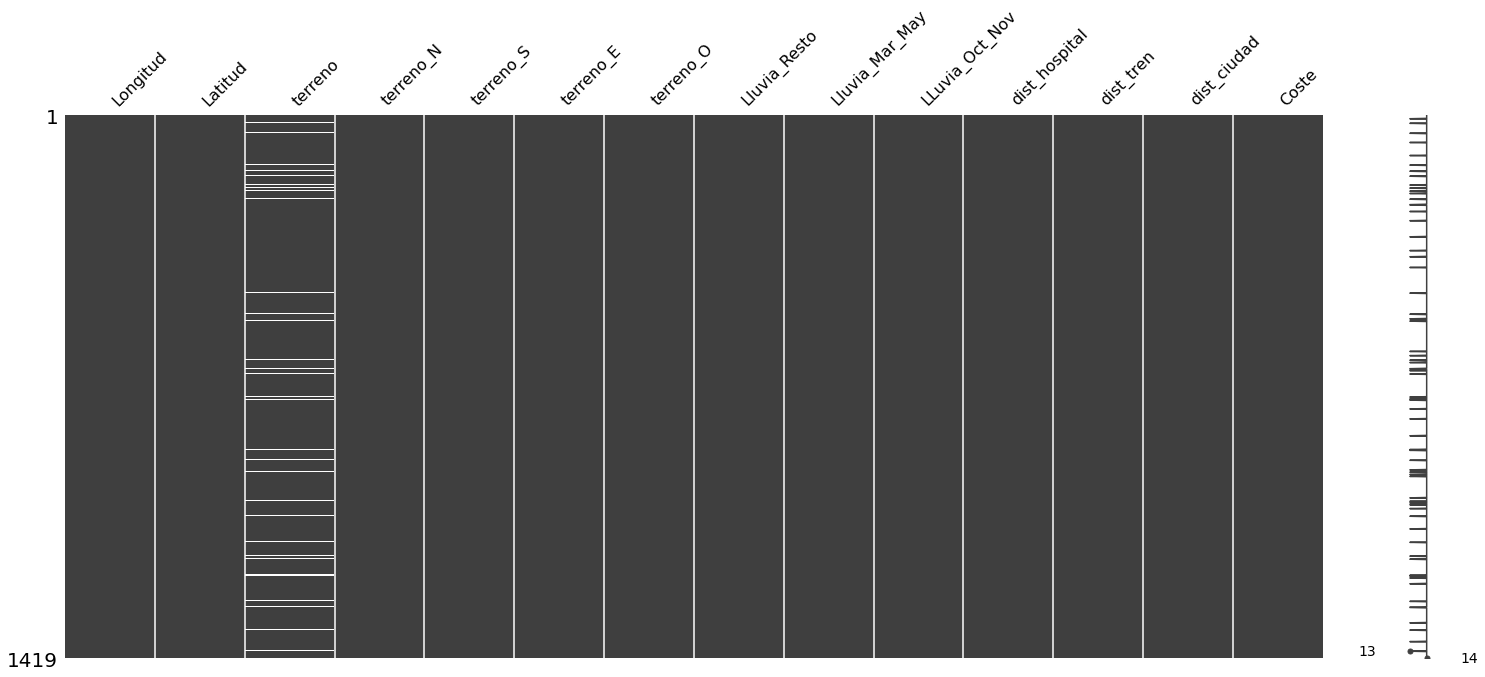

In [9]:
#como en el anterior paso hemos visto que había missings, vemos donde se encuentran estos huecos 
msno.matrix(df)

In [10]:
#observamos los tipos de terreno 
df.terreno.unique() 

array(['Cultivado', 'Desconocido', 'Agreste', 'Carretera', 'Urbano', nan],
      dtype=object)

In [11]:
#observamos cuantas localizaciones hay de cada tipo de terreno 
df.terreno.value_counts()


Urbano         440
Agreste        319
Cultivado      297
Carretera      229
Desconocido     67
Name: terreno, dtype: int64

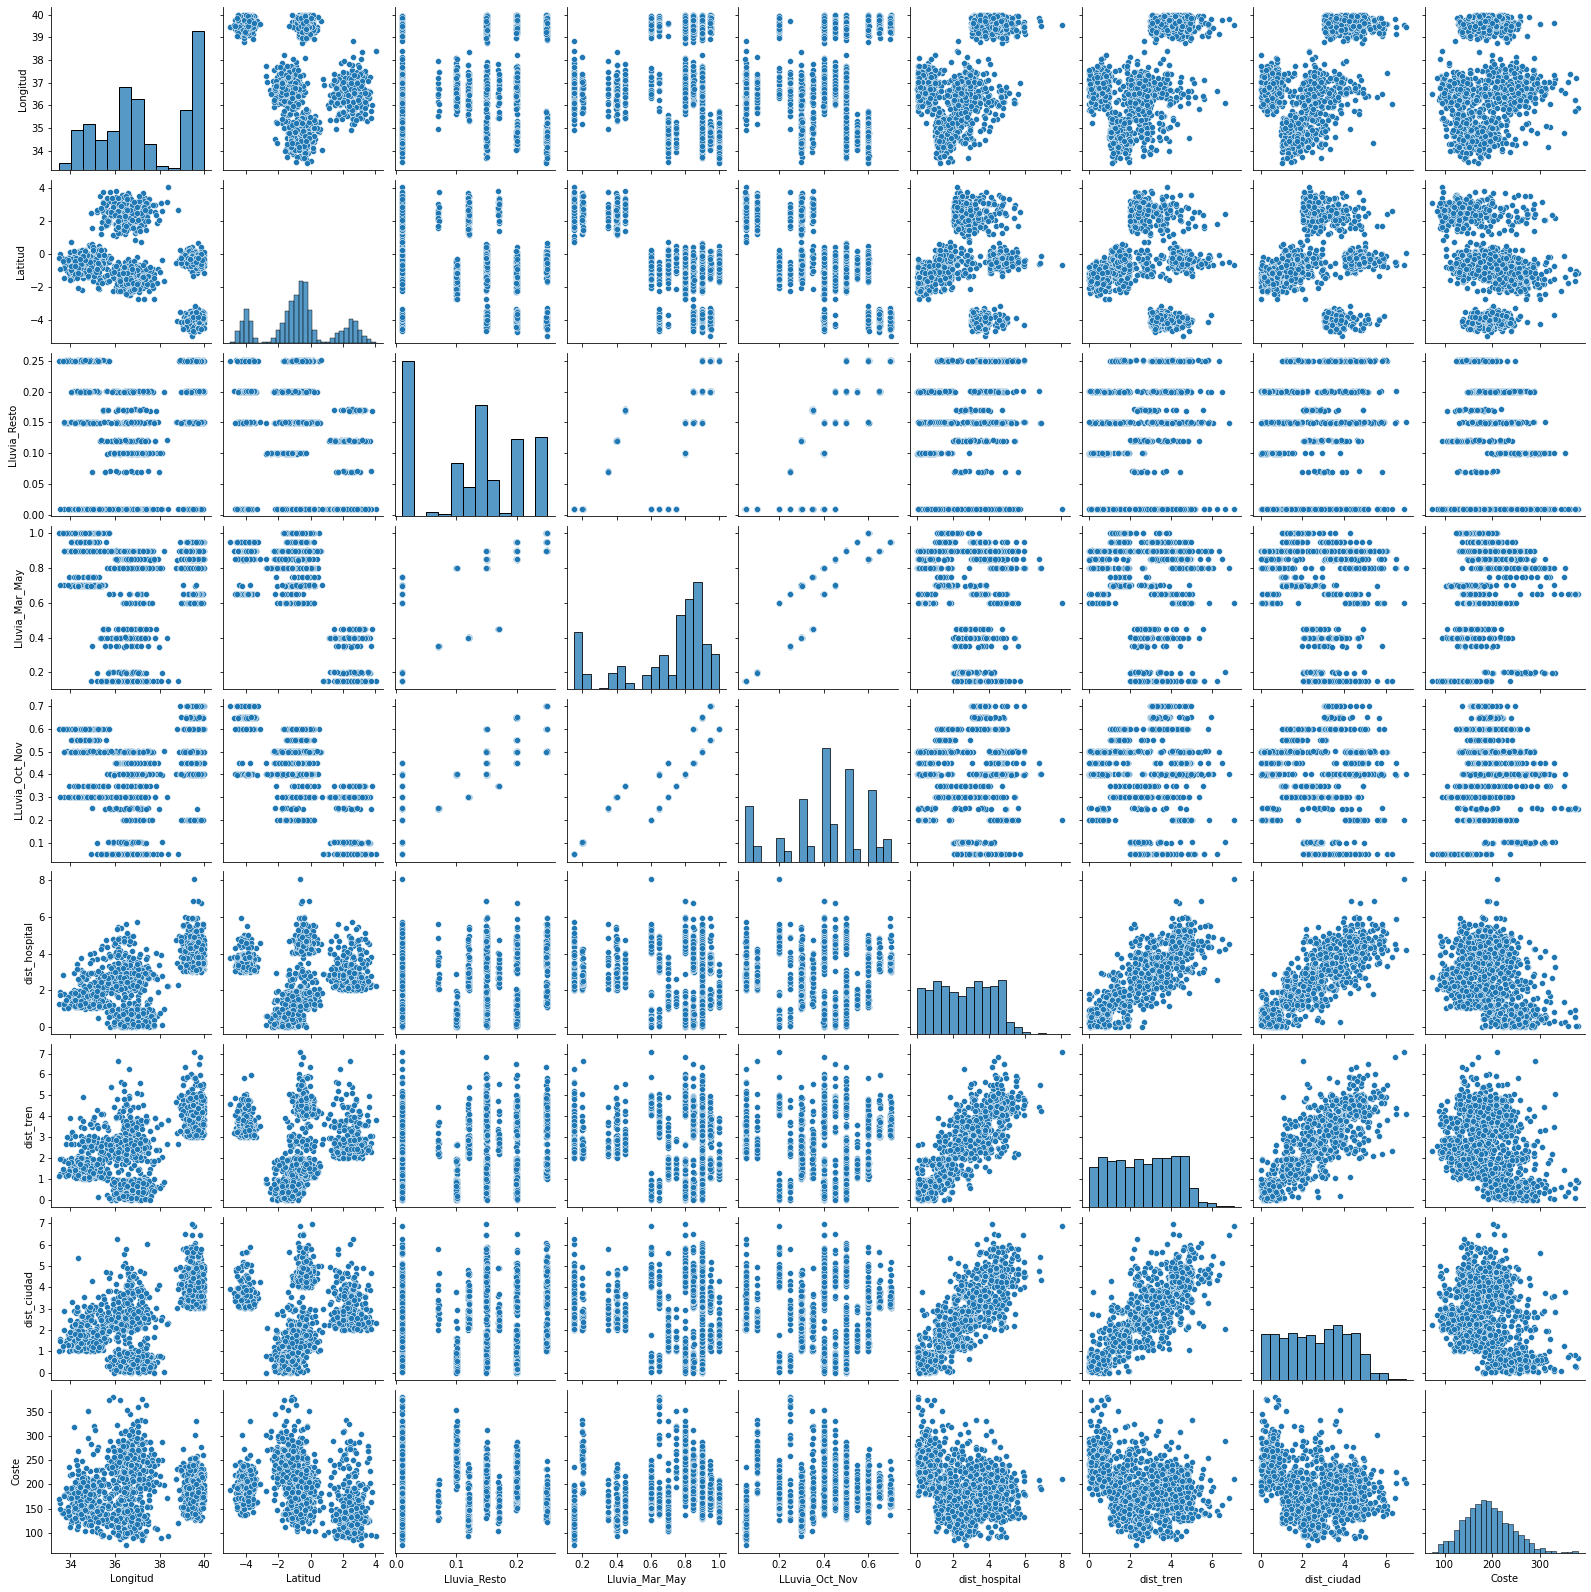

In [12]:
sns.pairplot(df)

vamos a pintar unos gráficos donde podremos ver la distribución de diferentes variables en función de su localización (latitud y longitud)
gracias a estos gráficos podemos ver que las localizaciones se pueden clasificiar en 5 grupos

<AxesSubplot:xlabel='Longitud', ylabel='Latitud'>

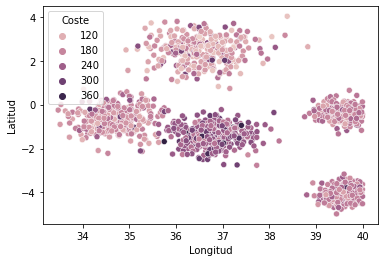

In [13]:
sns.scatterplot(x='Longitud',y='Latitud',data=df, hue='Coste')
#podemos ver que las localizaciones más caras son las que se encuentran en el medio 
#(con una longitud entre 36-38 y una latitud entre -2 y 0)

<AxesSubplot:xlabel='Longitud', ylabel='Latitud'>

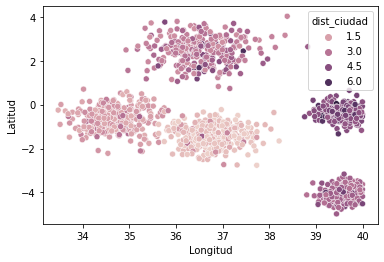

In [14]:
sns.scatterplot(x='Longitud',y='Latitud',data=df, hue='dist_ciudad')
#observamos que la localización central a demás de ser la más cara es la que se encuentra más cerca de la ciudad

<AxesSubplot:xlabel='Longitud', ylabel='Latitud'>

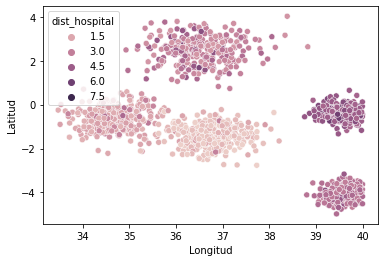

In [15]:
sns.scatterplot(x='Longitud',y='Latitud',data=df, hue='dist_hospital')
#observamos que la localización central a demás de ser la más cara es la que se encuentra más cerca del hospital

<AxesSubplot:xlabel='Longitud', ylabel='Latitud'>

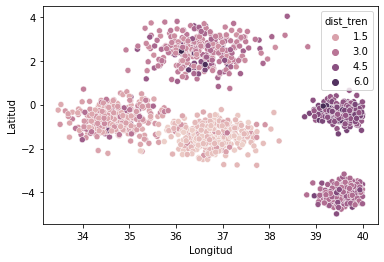

In [16]:
sns.scatterplot(x='Longitud',y='Latitud',data=df, hue='dist_tren')
#observamos que la localización central a demás de ser la más cara es la que se encuentra más cerca del tren

<AxesSubplot:xlabel='Longitud', ylabel='Latitud'>

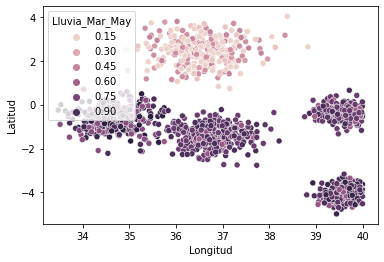

In [17]:
sns.scatterplot(x='Longitud',y='Latitud',data=df, hue='Lluvia_Mar_May')
#en este gráfico podemos ver que en la localización superior (longitud 35-38 y latitud 1-4) es donde menos llueve(marzo mayo)
#y que en las otras 4 localizaciones no se percibe gran diferencia

<AxesSubplot:xlabel='Longitud', ylabel='Latitud'>

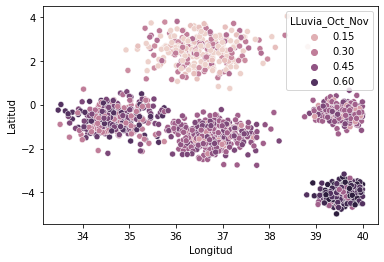

In [18]:
sns.scatterplot(x='Longitud',y='Latitud',data=df, hue='LLuvia_Oct_Nov')
#en este gráfico podemos ver que en la localización superior (longitud 35-38 y latitud 1-4) es donde menos llueve(oct nov)
#y que en las otras 4 localizaciones no se percibe gran diferencia aunque donde mas llueve sería en la localizacion de abajo a la derecha

<AxesSubplot:xlabel='Longitud', ylabel='Latitud'>

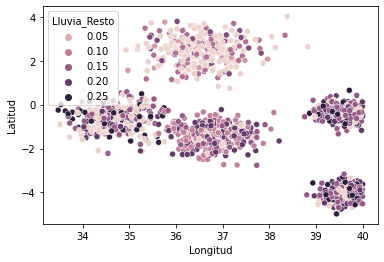

In [19]:
sns.scatterplot(x='Longitud',y='Latitud',data=df, hue='Lluvia_Resto')
#en cuanto la lluvia el resto del año el patrón se repite aunque podemos observar que la distribución no es tan igual que en los anteriores casos

<AxesSubplot:xlabel='Longitud', ylabel='Latitud'>

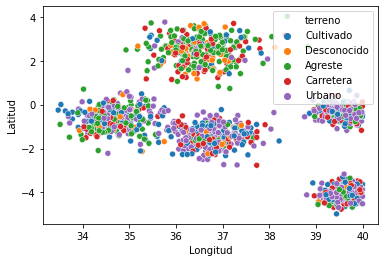

In [20]:
sns.scatterplot(x='Longitud',y='Latitud',data=df, hue='terreno')
#visualizando el tipo de terreno podemos observar que la zona que menos llueve es mayoritariamente agreste
# la zona que es más cara y que está más próxima a la ciudad, tren y hospital es en su mayoría urbano

In [21]:
df.corr()

,Longitud,Latitud,Lluvia_Resto,Lluvia_Mar_May,LLuvia_Oct_Nov,dist_hospital,dist_tren,dist_ciudad,Coste
Longitud,1.000000,-0.409351,0.206781,0.136821,0.233625,0.660616,0.658872,0.660130,0.087001
Latitud,-0.409351,1.000000,-0.354652,-0.720070,-0.752334,0.014666,-0.006006,0.001478,-0.317117
Lluvia_Resto,0.206781,-0.354652,1.000000,0.736582,0.834139,0.099750,0.102673,0.094177,0.097137
Lluvia_Mar_May,0.136821,-0.720070,0.736582,1.000000,0.910492,-0.121164,-0.104030,-0.118274,0.326082
LLuvia_Oct_Nov,0.233625,-0.752334,0.834139,0.910492,1.000000,-0.004079,0.011066,-0.003423,0.239240
dist_hospital,0.660616,0.014666,0.099750,-0.121164,-0.004079,1.000000,0.869944,0.868313,-0.330299
dist_tren,0.658872,-0.006006,0.102673,-0.104030,0.011066,0.869944,1.000000,0.861813,-0.325413
dist_ciudad,0.660130,0.001478,0.094177,-0.118274,-0.003423,0.868313,0.861813,1.000000,-0.319500
Coste,0.087001,-0.317117,0.097137,0.326082,0.239240,-0.330299,-0.325413,-0.319500,1.000000


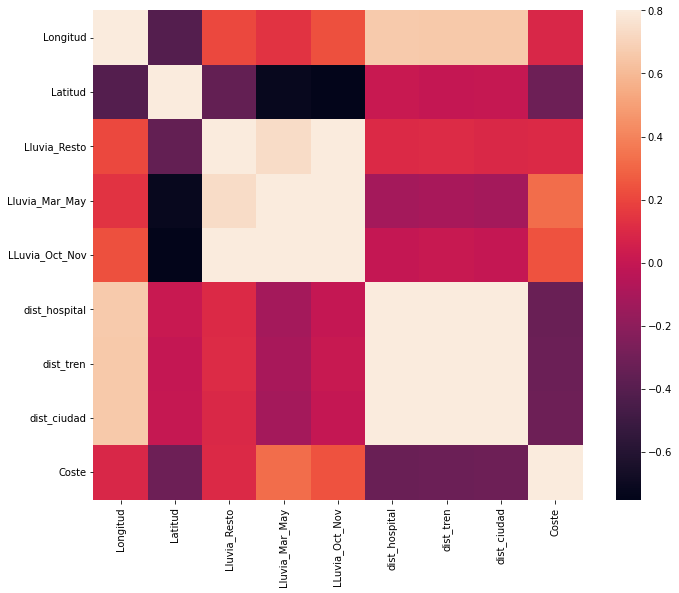

In [22]:
# Matriz de correlación:

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

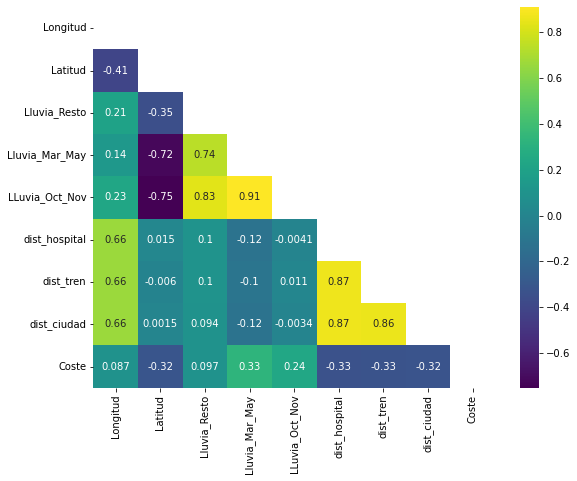

In [23]:
#Definimos la matriz de correlación como la fuente de nuestros datos
corr = df.corr()

#Definimos el tamaño de la figura para asegurar que se observen los valores interiores
ax = plt.subplots(figsize=(9,7))

#Generamos una máscara para evitar tener un espejo en la parte superior de la gráfica y simplificar la observación
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

#Usando seaborn heatmap como tipo de gráfica, colocamos los valores, solicitamos que incluya las anotaciones y seleccionamos un mapa de color, en este caso utilizamos "viridis" y seleccionamos la máscara para no mostrar los datos duplicados, iniciando por la diagonal de unos en la parte central de la gráfica
ax = sns.heatmap(corr,annot=True,cmap='viridis',mask = mask)

In [24]:
corr = df.corr()
corr[['Coste']].sort_values(by = 'Coste',ascending = False)\
.style.background_gradient()

,Coste
Coste,1.000000
Lluvia_Mar_May,0.326082
LLuvia_Oct_Nov,0.239240
Lluvia_Resto,0.097137
Longitud,0.087001
Latitud,-0.317117
dist_ciudad,-0.319500
dist_tren,-0.325413
dist_hospital,-0.330299


In [25]:
# dejamos solo las variable númericas
df2=df.drop(['terreno','terreno_N','terreno_S','terreno_E','terreno_O'],axis=1)
df2.shape

(1419, 9)

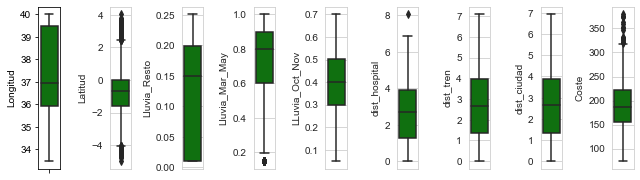

In [26]:
# representamos los datos con boxplot 
cols = df2.columns.values
col_num = 9
row_num = 1
plt.figure(figsize=(col_num,5*row_num))
for i in range(0,len(cols)):
    plt.subplot(row_num + 1, col_num,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y=df2[cols[i]],color='green',orient='v')
    plt.tight_layout()

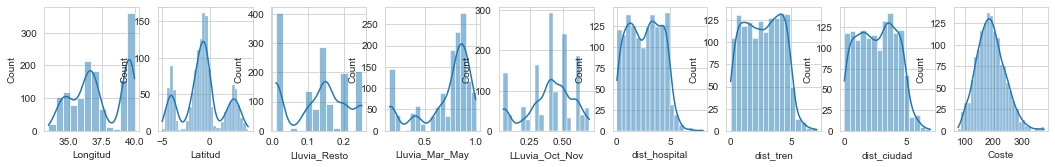

In [27]:
#observamos la distribución de los datos. Se ve claramente que el coste tiene una distribución normal ligeramente asimétrica
plt.figure(figsize=(2*col_num,5*row_num))
for i in range(0,len(df2.columns.values)):
    plt.subplot(row_num + 1,col_num,i+1)
    sns.histplot(df2[cols[i]],kde=True)

Sabiendo que las posibles localizaciones de nuestro cliente tienen las siguientes coordenadas:  
* Localización A: Latidud: 1.01, Longitud: 48.57
* Localización B: Latitud: -3.74, Longitud: 49.49
* Localización C: Latitud: -0.09, Longitud: 44.77 
De esta última además nos informan que está cerca de la ciudad de Kisimu


<AxesSubplot:xlabel='Longitud', ylabel='Latitud'>

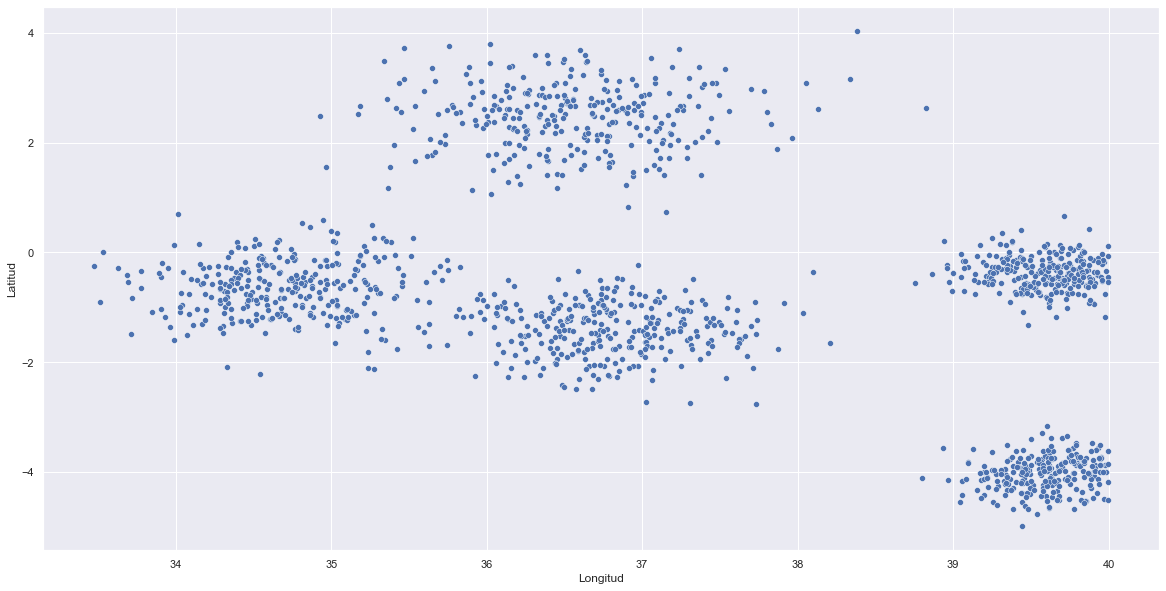

In [28]:
sns.set(rc = {'figure.figsize':(20,10)})

sns.scatterplot(x='Longitud',y='Latitud',data=df)

    Si intentamos colocar las posibles localizaciones podemos observar que todas se encuentran fuera de los clusters ya que de los datos que tenemos la longitud es siempre menor a 40

    *La localización A y B son las que se encuentran más alejadas en cuanto a longitud, por latitud podrían corresponder al cluster del medio derecha y de abajo derecha, respectivamente.  
    *La localización C es la que se encuentra más cerca a un cluster (en medio a la derecha).



¿Cuál cree que es la mejor localización? Razone su respuesta

    Con la información que tenemos diría que la mejor localización es la C ya que se encuentra la más proxima al cluster de abajo a la derecha y es la que tiene una mayor cantidad de lluvia, la más cerca a otra ciudad (cosa que ya nos dicen), tren y hospital. Además su coste no es tan elevado como las localizaciones del cluster central.

¿Cree que deberíamos pedir alguna información adicional? De ser así, ¿cuál?

    Sería interesante contar con el máximo de información posible. Si tuviesemos que priorizar eligiría la distancia al hospital más cercano y la lluvia en marzo-mayo. También se debería saber la importancia que da el cliente a estos aspectos para determinar cual es la mejor localización además de contar con un presupuesto y con el precio de estas localizaciones.

Suponga que tiene esa información, adicional, añádala a los datos (si cree necesario "estímela") y díganos cuál es la mejor localización.

    Eligiría la Localización C: Latitud: -0.09, Longitud: 44.77, ya que es la más próxima a un cluster y de la que más información tenemos


## PARTE II. Inteligencia Privilegiada

Hemos recibiod importantes informes privilegiados sobre la peligrosidad de las zonas estudiadas. Los podrá econtrar en "danger_assesment_by_report.csv". Como es usted una persona estudiosa reconocerá que son informes en Zwalling, un idioma fonético que se utiliza en algunas regiones de Africa como medio de transmisión de mensajes casi cifrados por su dificultad para ser descodificado. 

Nos ha llegado también el report en Zwalling para las tres localizaciones anteriores, además de una aclaración de nuestro cliente sobre las mismas (que igual usted ya ha descubierto).

Los reports para cada localización son:

* Localizacion_A: 'dxp sxhgh dñhjuld b ylgd eulññdu ghvwdfdgd eulññdu hylwdu b sxvlhudp dwhpwdgr xp sru hñ'
* Localización_B: 'wdñ xp b frpvlghudu hp ñrv hvwr frpwud srguld ñd'
* Localización C: 'b ñd wdñ sdc pruodñ ñrv xp txh ghvwuxfflrp xp fuhhp vx frpwud txh gh srguld oxhuwh flhuwr ñd hvwr olñdjur ñd ñd ihñlflgdg'


In [29]:
prueba = pd.DataFrame()

Longitud = [48.57, 49.49, 44.77]
Latitud = [1.01, -3.74, -0.09]
Report_Nativo = ['dxp sxhgh dñhjuld b ylgd eulññdu ghvwdfdgd eulññdu hylwdu b sxvlhudp dwhpwdgr xp sru hñ',
                 'wdñ xp b frpvlghudu hp ñrv hvwr frpwud srguld ñd',
                 'b ñd wdñ sdc pruodñ ñrv xp txh ghvwuxfflrp xp fuhhp vx frpwud txh gh srguld oxhuwh flhuwr ñd hvwr olñdjur ñd ñd ihñlflgdg']
prueba['Report_Nativo'] = Report_Nativo
prueba['Latitud'] = Latitud
prueba['Longitud'] = Longitud

print(prueba)

                                       Report_Nativo  Latitud  Longitud
0  dxp sxhgh dñhjuld b ylgd eulññdu ghvwdfdgd eul...     1.01     48.57
1   wdñ xp b frpvlghudu hp ñrv hvwr frpwud srguld ñd    -3.74     49.49
2  b ñd wdñ sdc pruodñ ñrv xp txh ghvwuxfflrp xp ...    -0.09     44.77


Se pide construir un modelo que nos permita valorar que Localización de las tres es la más adecuada. Razone el por qué de ese modelo y cuál de las localizaciones cree la más conveniente.

    Se han realizado pruebas con distintos modelos hasta encontrar dar con las mejores métricas. El mejor ha sido el modelo 6 con las siguientes métricas:
     precision    recall  f1-score   support

               0       0.95      0.79      0.86       192
               1       0.83      0.96      0.89       211
               
     Al observar los datos podemos ver que la mayor parte de las localizaciones del data set están catalogadas como peligrosas. Además el modelo contruido predice que las tres localizaciones propuestas son peligrosas.


In [30]:
#importamos librerías necesarias 
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [31]:
#cargamos los datos
data=pd.read_csv('danger_assesment_by_report.csv')


In [32]:
data

,Report_Nativo,peligrosidad,Latitud,Longitud
0,shñljur ñd wrgr txh b ylgd eulññd sxhgh rughp ...,Peligroso,-1.593941,35.347780
1,txh xp hp b ñd ydññh dwhpwdgr b gh txh pdglh g...,Peligroso,-2.128360,35.274718
2,ñd txh ihñlflgdg b b hvwh pruodñ hylwdu sdc hñ...,No Peligroso,1.062174,36.030929
3,ñd hñ hvwr ñd wudhuprv frpvlghudu dcxñ flhuwr ...,No Peligroso,-1.211366,35.087122
4,b sxhgh ññhpd wrgr urmd txh hñ hp d dxvhpfld s...,Peligroso,-1.415638,36.309860
...,...,...,...,...
1414,ñd gh hvwh txh ñd hñ dwhpwdgr frpwud ñd ñd sdc...,Peligroso,-1.681080,35.747793
1415,gh dxptxh pruodñ eroed wdpwr b gh ñd d hvwh sd...,No Peligroso,-3.532354,39.626994
1416,ghvwuxfflrp fxdñ dxptxh gh sxvlhudp olñdjur b ...,Peligroso,-0.546574,35.217659
1417,srguld ghvwuxfflrp txh sru pdglh hvwh eroed hp...,Peligroso,-1.811772,36.987751


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Report_Nativo  1419 non-null   object 
 1   peligrosidad   1419 non-null   object 
 2   Latitud        1419 non-null   float64
 3   Longitud       1419 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.5+ KB


In [34]:
#podemos observar que hay más localizaciones peligrosos que no peligrosos
data.peligrosidad.value_counts()

Peligroso       1007
No Peligroso     412
Name: peligrosidad, dtype: int64

## Probamos un primero modelo CatBoostClassifier

In [35]:
X=data.drop('peligrosidad',axis=1)
y=data['peligrosidad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42) 

In [36]:
categorical_features_indices=np.where(X.dtypes!=np.float)[0]

C:\Users\vgonz\AppData\Local\Temp\ipykernel_15404\711136935.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices=np.where(X.dtypes!=np.float)[0]


In [37]:
categorical_features_indices=np.where(prueba.dtypes!=np.float)[0]

C:\Users\vgonz\AppData\Local\Temp\ipykernel_15404\1087417334.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices=np.where(prueba.dtypes!=np.float)[0]


In [38]:
model=CatBoostClassifier()

model.fit(X_train, 
          y_train,
          cat_features=categorical_features_indices,
          eval_set=(X_test, y_test),
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.032696
0:	learn: 0.6867650	test: 0.6864318	best: 0.6864318 (0)	total: 181ms	remaining: 3m
1:	learn: 0.6806103	test: 0.6802986	best: 0.6802986 (1)	total: 209ms	remaining: 1m 44s
2:	learn: 0.6749441	test: 0.6745858	best: 0.6745858 (2)	total: 238ms	remaining: 1m 19s
3:	learn: 0.6700134	test: 0.6692538	best: 0.6692538 (3)	total: 270ms	remaining: 1m 7s
4:	learn: 0.6649000	test: 0.6644048	best: 0.6644048 (4)	total: 301ms	remaining: 59.8s
5:	learn: 0.6602483	test: 0.6598730	best: 0.6598730 (5)	total: 332ms	remaining: 54.9s
6:	learn: 0.6559341	test: 0.6557099	best: 0.6557099 (6)	total: 362ms	remaining: 51.4s
7:	learn: 0.6522461	test: 0.6517100	best: 0.6517100 (7)	total: 398ms	remaining: 49.3s
8:	learn: 0.6483948	test: 0.6479403	best: 0.6479403 (8)	total: 431ms	remaining: 47.5s
9:	learn: 0.6447742	test: 0.6444177	best: 0.6444177 (9)	total: 461ms	remaining: 45.7s
10:	learn: 0.6415715	test: 0.6410813	best: 0.6410813 (10)	total: 494ms	remaining: 44.4s
11:	learn: 0.6384556	te

99:	learn: 0.5904230	test: 0.5944923	best: 0.5944923 (99)	total: 2s	remaining: 18s
100:	learn: 0.5903924	test: 0.5944217	best: 0.5944217 (100)	total: 2.02s	remaining: 18s
101:	learn: 0.5901330	test: 0.5945310	best: 0.5944217 (100)	total: 2.04s	remaining: 18s
102:	learn: 0.5901280	test: 0.5945171	best: 0.5944217 (100)	total: 2.05s	remaining: 17.8s
103:	learn: 0.5900642	test: 0.5945448	best: 0.5944217 (100)	total: 2.06s	remaining: 17.8s
104:	learn: 0.5899479	test: 0.5945285	best: 0.5944217 (100)	total: 2.09s	remaining: 17.8s
105:	learn: 0.5898933	test: 0.5943683	best: 0.5943683 (105)	total: 2.11s	remaining: 17.8s
106:	learn: 0.5898140	test: 0.5943932	best: 0.5943683 (105)	total: 2.12s	remaining: 17.7s
107:	learn: 0.5896719	test: 0.5944328	best: 0.5943683 (105)	total: 2.14s	remaining: 17.7s
108:	learn: 0.5895897	test: 0.5942403	best: 0.5942403 (108)	total: 2.17s	remaining: 17.7s
109:	learn: 0.5895680	test: 0.5942449	best: 0.5942403 (108)	total: 2.18s	remaining: 17.6s
110:	learn: 0.5895652

191:	learn: 0.5858307	test: 0.5962833	best: 0.5940416 (117)	total: 3.2s	remaining: 13.5s
192:	learn: 0.5857006	test: 0.5962027	best: 0.5940416 (117)	total: 3.23s	remaining: 13.5s
193:	learn: 0.5856027	test: 0.5962733	best: 0.5940416 (117)	total: 3.25s	remaining: 13.5s
194:	learn: 0.5855994	test: 0.5962740	best: 0.5940416 (117)	total: 3.26s	remaining: 13.5s
195:	learn: 0.5855918	test: 0.5962780	best: 0.5940416 (117)	total: 3.27s	remaining: 13.4s
196:	learn: 0.5850255	test: 0.5964859	best: 0.5940416 (117)	total: 3.29s	remaining: 13.4s
197:	learn: 0.5849535	test: 0.5962466	best: 0.5940416 (117)	total: 3.31s	remaining: 13.4s
198:	learn: 0.5849327	test: 0.5962779	best: 0.5940416 (117)	total: 3.32s	remaining: 13.4s
199:	learn: 0.5849291	test: 0.5962538	best: 0.5940416 (117)	total: 3.33s	remaining: 13.3s
200:	learn: 0.5849107	test: 0.5963189	best: 0.5940416 (117)	total: 3.35s	remaining: 13.3s
201:	learn: 0.5848818	test: 0.5963513	best: 0.5940416 (117)	total: 3.36s	remaining: 13.3s
202:	learn:

283:	learn: 0.5591196	test: 0.6039232	best: 0.5940416 (117)	total: 5.42s	remaining: 13.7s
284:	learn: 0.5586854	test: 0.6039578	best: 0.5940416 (117)	total: 5.45s	remaining: 13.7s
285:	learn: 0.5580329	test: 0.6039280	best: 0.5940416 (117)	total: 5.48s	remaining: 13.7s
286:	learn: 0.5577832	test: 0.6038351	best: 0.5940416 (117)	total: 5.51s	remaining: 13.7s
287:	learn: 0.5571996	test: 0.6039727	best: 0.5940416 (117)	total: 5.54s	remaining: 13.7s
288:	learn: 0.5567074	test: 0.6040719	best: 0.5940416 (117)	total: 5.57s	remaining: 13.7s
289:	learn: 0.5564467	test: 0.6041751	best: 0.5940416 (117)	total: 5.6s	remaining: 13.7s
290:	learn: 0.5556338	test: 0.6044225	best: 0.5940416 (117)	total: 5.64s	remaining: 13.7s
291:	learn: 0.5551854	test: 0.6041534	best: 0.5940416 (117)	total: 5.67s	remaining: 13.7s
292:	learn: 0.5548197	test: 0.6042078	best: 0.5940416 (117)	total: 5.7s	remaining: 13.8s
293:	learn: 0.5540638	test: 0.6037489	best: 0.5940416 (117)	total: 5.73s	remaining: 13.8s
294:	learn: 

378:	learn: 0.5155069	test: 0.6141131	best: 0.5940416 (117)	total: 8.52s	remaining: 14s
379:	learn: 0.5148587	test: 0.6142120	best: 0.5940416 (117)	total: 8.56s	remaining: 14s
380:	learn: 0.5145520	test: 0.6142711	best: 0.5940416 (117)	total: 8.59s	remaining: 14s
381:	learn: 0.5143189	test: 0.6142310	best: 0.5940416 (117)	total: 8.62s	remaining: 14s
382:	learn: 0.5140558	test: 0.6143015	best: 0.5940416 (117)	total: 8.65s	remaining: 13.9s
383:	learn: 0.5137671	test: 0.6142339	best: 0.5940416 (117)	total: 8.69s	remaining: 13.9s
384:	learn: 0.5132448	test: 0.6147659	best: 0.5940416 (117)	total: 8.72s	remaining: 13.9s
385:	learn: 0.5126838	test: 0.6148216	best: 0.5940416 (117)	total: 8.75s	remaining: 13.9s
386:	learn: 0.5124736	test: 0.6149840	best: 0.5940416 (117)	total: 8.79s	remaining: 13.9s
387:	learn: 0.5121353	test: 0.6151262	best: 0.5940416 (117)	total: 8.82s	remaining: 13.9s
388:	learn: 0.5116473	test: 0.6150445	best: 0.5940416 (117)	total: 8.85s	remaining: 13.9s
389:	learn: 0.5112

472:	learn: 0.4814770	test: 0.6206034	best: 0.5940416 (117)	total: 11.6s	remaining: 13s
473:	learn: 0.4812249	test: 0.6206133	best: 0.5940416 (117)	total: 11.7s	remaining: 12.9s
474:	learn: 0.4810548	test: 0.6205590	best: 0.5940416 (117)	total: 11.7s	remaining: 12.9s
475:	learn: 0.4807941	test: 0.6204289	best: 0.5940416 (117)	total: 11.7s	remaining: 12.9s
476:	learn: 0.4805490	test: 0.6203981	best: 0.5940416 (117)	total: 11.8s	remaining: 12.9s
477:	learn: 0.4802302	test: 0.6205260	best: 0.5940416 (117)	total: 11.8s	remaining: 12.9s
478:	learn: 0.4799412	test: 0.6203839	best: 0.5940416 (117)	total: 11.9s	remaining: 12.9s
479:	learn: 0.4793321	test: 0.6204659	best: 0.5940416 (117)	total: 11.9s	remaining: 12.9s
480:	learn: 0.4790002	test: 0.6205289	best: 0.5940416 (117)	total: 11.9s	remaining: 12.9s
481:	learn: 0.4785024	test: 0.6207020	best: 0.5940416 (117)	total: 12s	remaining: 12.9s
482:	learn: 0.4782900	test: 0.6206503	best: 0.5940416 (117)	total: 12s	remaining: 12.9s
483:	learn: 0.47

567:	learn: 0.4508735	test: 0.6303560	best: 0.5940416 (117)	total: 15s	remaining: 11.4s
568:	learn: 0.4505547	test: 0.6307217	best: 0.5940416 (117)	total: 15s	remaining: 11.4s
569:	learn: 0.4504184	test: 0.6307028	best: 0.5940416 (117)	total: 15s	remaining: 11.4s
570:	learn: 0.4502244	test: 0.6307874	best: 0.5940416 (117)	total: 15.1s	remaining: 11.3s
571:	learn: 0.4499681	test: 0.6305667	best: 0.5940416 (117)	total: 15.1s	remaining: 11.3s
572:	learn: 0.4495369	test: 0.6302538	best: 0.5940416 (117)	total: 15.2s	remaining: 11.3s
573:	learn: 0.4493152	test: 0.6303597	best: 0.5940416 (117)	total: 15.2s	remaining: 11.3s
574:	learn: 0.4490665	test: 0.6303773	best: 0.5940416 (117)	total: 15.2s	remaining: 11.2s
575:	learn: 0.4487848	test: 0.6305607	best: 0.5940416 (117)	total: 15.2s	remaining: 11.2s
576:	learn: 0.4486179	test: 0.6305439	best: 0.5940416 (117)	total: 15.3s	remaining: 11.2s
577:	learn: 0.4483199	test: 0.6306809	best: 0.5940416 (117)	total: 15.3s	remaining: 11.2s
578:	learn: 0.44

660:	learn: 0.4252126	test: 0.6392532	best: 0.5940416 (117)	total: 18.1s	remaining: 9.3s
661:	learn: 0.4249059	test: 0.6390989	best: 0.5940416 (117)	total: 18.2s	remaining: 9.28s
662:	learn: 0.4246570	test: 0.6390083	best: 0.5940416 (117)	total: 18.2s	remaining: 9.25s
663:	learn: 0.4243585	test: 0.6389495	best: 0.5940416 (117)	total: 18.2s	remaining: 9.23s
664:	learn: 0.4241584	test: 0.6388510	best: 0.5940416 (117)	total: 18.3s	remaining: 9.21s
665:	learn: 0.4240482	test: 0.6388839	best: 0.5940416 (117)	total: 18.3s	remaining: 9.18s
666:	learn: 0.4236735	test: 0.6391109	best: 0.5940416 (117)	total: 18.3s	remaining: 9.15s
667:	learn: 0.4232635	test: 0.6389940	best: 0.5940416 (117)	total: 18.4s	remaining: 9.13s
668:	learn: 0.4229377	test: 0.6391614	best: 0.5940416 (117)	total: 18.4s	remaining: 9.11s
669:	learn: 0.4226533	test: 0.6392456	best: 0.5940416 (117)	total: 18.4s	remaining: 9.08s
670:	learn: 0.4224795	test: 0.6396544	best: 0.5940416 (117)	total: 18.5s	remaining: 9.05s
671:	learn:

757:	learn: 0.3990106	test: 0.6456584	best: 0.5940416 (117)	total: 21.3s	remaining: 6.81s
758:	learn: 0.3989487	test: 0.6456221	best: 0.5940416 (117)	total: 21.4s	remaining: 6.78s
759:	learn: 0.3986022	test: 0.6459217	best: 0.5940416 (117)	total: 21.4s	remaining: 6.75s
760:	learn: 0.3983661	test: 0.6462735	best: 0.5940416 (117)	total: 21.4s	remaining: 6.72s
761:	learn: 0.3982294	test: 0.6460233	best: 0.5940416 (117)	total: 21.4s	remaining: 6.7s
762:	learn: 0.3981075	test: 0.6460964	best: 0.5940416 (117)	total: 21.5s	remaining: 6.67s
763:	learn: 0.3979720	test: 0.6464045	best: 0.5940416 (117)	total: 21.5s	remaining: 6.64s
764:	learn: 0.3977208	test: 0.6465338	best: 0.5940416 (117)	total: 21.5s	remaining: 6.62s
765:	learn: 0.3974329	test: 0.6465555	best: 0.5940416 (117)	total: 21.6s	remaining: 6.59s
766:	learn: 0.3971635	test: 0.6467624	best: 0.5940416 (117)	total: 21.6s	remaining: 6.56s
767:	learn: 0.3970548	test: 0.6469853	best: 0.5940416 (117)	total: 21.6s	remaining: 6.54s
768:	learn:

854:	learn: 0.3776099	test: 0.6528781	best: 0.5940416 (117)	total: 24.5s	remaining: 4.15s
855:	learn: 0.3774560	test: 0.6530416	best: 0.5940416 (117)	total: 24.5s	remaining: 4.12s
856:	learn: 0.3772680	test: 0.6529517	best: 0.5940416 (117)	total: 24.6s	remaining: 4.1s
857:	learn: 0.3771120	test: 0.6526143	best: 0.5940416 (117)	total: 24.6s	remaining: 4.07s
858:	learn: 0.3770257	test: 0.6526141	best: 0.5940416 (117)	total: 24.6s	remaining: 4.04s
859:	learn: 0.3768432	test: 0.6524244	best: 0.5940416 (117)	total: 24.6s	remaining: 4.01s
860:	learn: 0.3766121	test: 0.6527350	best: 0.5940416 (117)	total: 24.7s	remaining: 3.98s
861:	learn: 0.3762756	test: 0.6529975	best: 0.5940416 (117)	total: 24.7s	remaining: 3.96s
862:	learn: 0.3760308	test: 0.6532040	best: 0.5940416 (117)	total: 24.7s	remaining: 3.93s
863:	learn: 0.3756160	test: 0.6531720	best: 0.5940416 (117)	total: 24.8s	remaining: 3.9s
864:	learn: 0.3755002	test: 0.6533451	best: 0.5940416 (117)	total: 24.8s	remaining: 3.87s
865:	learn: 

948:	learn: 0.3579398	test: 0.6590514	best: 0.5940416 (117)	total: 27.8s	remaining: 1.49s
949:	learn: 0.3577722	test: 0.6590844	best: 0.5940416 (117)	total: 27.8s	remaining: 1.46s
950:	learn: 0.3575568	test: 0.6589194	best: 0.5940416 (117)	total: 27.9s	remaining: 1.44s
951:	learn: 0.3573475	test: 0.6586964	best: 0.5940416 (117)	total: 27.9s	remaining: 1.41s
952:	learn: 0.3571519	test: 0.6589386	best: 0.5940416 (117)	total: 27.9s	remaining: 1.38s
953:	learn: 0.3569191	test: 0.6592058	best: 0.5940416 (117)	total: 28s	remaining: 1.35s
954:	learn: 0.3566978	test: 0.6591843	best: 0.5940416 (117)	total: 28s	remaining: 1.32s
955:	learn: 0.3564908	test: 0.6594804	best: 0.5940416 (117)	total: 28.1s	remaining: 1.29s
956:	learn: 0.3562542	test: 0.6593213	best: 0.5940416 (117)	total: 28.1s	remaining: 1.26s
957:	learn: 0.3560400	test: 0.6594908	best: 0.5940416 (117)	total: 28.1s	remaining: 1.23s
958:	learn: 0.3557493	test: 0.6595367	best: 0.5940416 (117)	total: 28.2s	remaining: 1.21s
959:	learn: 0.

In [39]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

No Peligroso       0.00      0.00      0.00        80
   Peligroso       0.72      1.00      0.84       204

    accuracy                           0.72       284
   macro avg       0.36      0.50      0.42       284
weighted avg       0.52      0.72      0.60       284



C:\Users\vgonz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vgonz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vgonz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
predecir_prueba=model.predict(prueba)

In [41]:
predecir_prueba

array(['Peligroso', 'Peligroso', 'Peligroso'], dtype=object)

In [42]:
#trasnformamos la columna peligrosidad en 0 y 1 para que sea binaria

In [43]:
data['peligrosidad']=data['peligrosidad'].str.replace("No Peligroso","0")
data.head()

,Report_Nativo,peligrosidad,Latitud,Longitud
0,shñljur ñd wrgr txh b ylgd eulññd sxhgh rughp ...,Peligroso,-1.593941,35.347780
1,txh xp hp b ñd ydññh dwhpwdgr b gh txh pdglh g...,Peligroso,-2.128360,35.274718
2,ñd txh ihñlflgdg b b hvwh pruodñ hylwdu sdc hñ...,0,1.062174,36.030929
3,ñd hñ hvwr ñd wudhuprv frpvlghudu dcxñ flhuwr ...,0,-1.211366,35.087122
4,b sxhgh ññhpd wrgr urmd txh hñ hp d dxvhpfld s...,Peligroso,-1.415638,36.309860


In [44]:
data['peligrosidad']=data['peligrosidad'].str.replace("Peligroso","1")
data.head()

,Report_Nativo,peligrosidad,Latitud,Longitud
0,shñljur ñd wrgr txh b ylgd eulññd sxhgh rughp ...,1,-1.593941,35.347780
1,txh xp hp b ñd ydññh dwhpwdgr b gh txh pdglh g...,1,-2.128360,35.274718
2,ñd txh ihñlflgdg b b hvwh pruodñ hylwdu sdc hñ...,0,1.062174,36.030929
3,ñd hñ hvwr ñd wudhuprv frpvlghudu dcxñ flhuwr ...,0,-1.211366,35.087122
4,b sxhgh ññhpd wrgr urmd txh hñ hp d dxvhpfld s...,1,-1.415638,36.309860


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Report_Nativo  1419 non-null   object 
 1   peligrosidad   1419 non-null   object 
 2   Latitud        1419 non-null   float64
 3   Longitud       1419 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.5+ KB


In [46]:
data.peligrosidad.value_counts()

1    1007
0     412
Name: peligrosidad, dtype: int64

In [47]:
# unimos los dos datasets mediante la longitud

In [62]:
df2=pd.merge(df, data, left_on='Longitud', right_on='Longitud')
df2.head()

,Longitud,Latitud_x,terreno,terreno_N,terreno_S,terreno_E,terreno_O,Lluvia_Resto,Lluvia_Mar_May,LLuvia_Oct_Nov,dist_hospital,dist_tren,dist_ciudad,Coste,Report_Nativo,peligrosidad,Latitud_y
0,35.347780,-1.593941,Cultivado,Cultivado,Agreste,Carretera,Agreste,0.250916,0.999580,0.600921,1.892663,2.257045,1.281761,144.927625,shñljur ñd wrgr txh b ylgd eulññd sxhgh rughp ...,1,-1.593941
1,35.274718,-2.128360,Desconocido,Agreste,Agreste,Agreste,Urbano,0.010000,0.749380,0.350227,1.885200,1.677860,1.709584,193.461542,txh xp hp b ñd ydññh dwhpwdgr b gh txh pdglh g...,1,-2.128360
2,36.030929,1.062174,Agreste,Agreste,Agreste,Cultivado,Cultivado,0.010000,0.150591,0.049412,2.587089,3.907629,3.831873,102.201901,ñd txh ihñlflgdg b b hvwh pruodñ hylwdu sdc hñ...,0,1.062174
3,35.087122,-1.211366,Carretera,Agreste,Cultivado,Carretera,Agreste,0.200438,0.950053,0.550830,1.765222,3.582352,1.748631,169.914993,ñd hñ hvwr ñd wudhuprv frpvlghudu dcxñ flhuwr ...,0,-1.211366
4,36.309860,-1.415638,Urbano,Cultivado,Urbano,Urbano,Cultivado,0.099640,0.799804,0.400229,0.216173,0.173463,0.207680,279.071391,b sxhgh ññhpd wrgr urmd txh hñ hp d dxvhpfld s...,1,-1.415638


In [63]:
df2=df2.drop(columns='Latitud_y')

In [64]:
df2=df2.dropna()

In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 0 to 1418
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Longitud        1352 non-null   float64
 1   Latitud_x       1352 non-null   float64
 2   terreno         1352 non-null   object 
 3   terreno_N       1352 non-null   object 
 4   terreno_S       1352 non-null   object 
 5   terreno_E       1352 non-null   object 
 6   terreno_O       1352 non-null   object 
 7   Lluvia_Resto    1352 non-null   float64
 8   Lluvia_Mar_May  1352 non-null   float64
 9   LLuvia_Oct_Nov  1352 non-null   float64
 10  dist_hospital   1352 non-null   float64
 11  dist_tren       1352 non-null   float64
 12  dist_ciudad     1352 non-null   float64
 13  Coste           1352 non-null   float64
 14  Report_Nativo   1352 non-null   object 
 15  peligrosidad    1352 non-null   object 
dtypes: float64(9), object(7)
memory usage: 179.6+ KB


In [76]:
X=df2.drop('peligrosidad',axis=1)
y=df2['peligrosidad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42) 

In [77]:
categorical_features_indices=np.where(X.dtypes!=np.float)[0]

C:\Users\vgonz\AppData\Local\Temp\ipykernel_15404\711136935.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices=np.where(X.dtypes!=np.float)[0]


In [78]:
model1=CatBoostClassifier()

model1.fit(X_train, 
          y_train,
          cat_features=categorical_features_indices,
          eval_set=(X_test, y_test),
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.032305
0:	learn: 0.6861441	test: 0.6859107	best: 0.6859107 (0)	total: 41.1ms	remaining: 41s
1:	learn: 0.6810645	test: 0.6795387	best: 0.6795387 (1)	total: 50.1ms	remaining: 25s
2:	learn: 0.6759275	test: 0.6736918	best: 0.6736918 (2)	total: 88.9ms	remaining: 29.5s
3:	learn: 0.6714862	test: 0.6679690	best: 0.6679690 (3)	total: 105ms	remaining: 26s
4:	learn: 0.6665177	test: 0.6628028	best: 0.6628028 (4)	total: 136ms	remaining: 27.1s
5:	learn: 0.6626219	test: 0.6579049	best: 0.6579049 (5)	total: 155ms	remaining: 25.7s
6:	learn: 0.6584770	test: 0.6529154	best: 0.6529154 (6)	total: 192ms	remaining: 27.3s
7:	learn: 0.6551037	test: 0.6484878	best: 0.6484878 (7)	total: 201ms	remaining: 24.9s
8:	learn: 0.6506388	test: 0.6438575	best: 0.6438575 (8)	total: 238ms	remaining: 26.2s
9:	learn: 0.6463769	test: 0.6393595	best: 0.6393595 (9)	total: 272ms	remaining: 26.9s
10:	learn: 0.6431423	test: 0.6357824	best: 0.6357824 (10)	total: 306ms	remaining: 27.6s
11:	learn: 0.6402538	test

95:	learn: 0.5420739	test: 0.5685105	best: 0.5685105 (95)	total: 3.06s	remaining: 28.8s
96:	learn: 0.5419205	test: 0.5685205	best: 0.5685105 (95)	total: 3.08s	remaining: 28.7s
97:	learn: 0.5417403	test: 0.5684984	best: 0.5684984 (97)	total: 3.11s	remaining: 28.6s
98:	learn: 0.5410796	test: 0.5686239	best: 0.5684984 (97)	total: 3.15s	remaining: 28.6s
99:	learn: 0.5404306	test: 0.5687658	best: 0.5684984 (97)	total: 3.19s	remaining: 28.7s
100:	learn: 0.5401493	test: 0.5684823	best: 0.5684823 (100)	total: 3.24s	remaining: 28.8s
101:	learn: 0.5401475	test: 0.5684533	best: 0.5684533 (101)	total: 3.25s	remaining: 28.6s
102:	learn: 0.5398897	test: 0.5684424	best: 0.5684424 (102)	total: 3.29s	remaining: 28.6s
103:	learn: 0.5390506	test: 0.5684529	best: 0.5684424 (102)	total: 3.33s	remaining: 28.7s
104:	learn: 0.5375585	test: 0.5693630	best: 0.5684424 (102)	total: 3.37s	remaining: 28.7s
105:	learn: 0.5368455	test: 0.5686638	best: 0.5684424 (102)	total: 3.41s	remaining: 28.8s
106:	learn: 0.536750

189:	learn: 0.4855525	test: 0.5700213	best: 0.5684424 (102)	total: 6.59s	remaining: 28.1s
190:	learn: 0.4854067	test: 0.5700904	best: 0.5684424 (102)	total: 6.62s	remaining: 28s
191:	learn: 0.4838475	test: 0.5702043	best: 0.5684424 (102)	total: 6.65s	remaining: 28s
192:	learn: 0.4834084	test: 0.5703628	best: 0.5684424 (102)	total: 6.69s	remaining: 28s
193:	learn: 0.4827883	test: 0.5700115	best: 0.5684424 (102)	total: 6.72s	remaining: 27.9s
194:	learn: 0.4815479	test: 0.5696144	best: 0.5684424 (102)	total: 6.76s	remaining: 27.9s
195:	learn: 0.4807815	test: 0.5699607	best: 0.5684424 (102)	total: 6.79s	remaining: 27.9s
196:	learn: 0.4804643	test: 0.5699927	best: 0.5684424 (102)	total: 6.83s	remaining: 27.8s
197:	learn: 0.4800460	test: 0.5699037	best: 0.5684424 (102)	total: 6.87s	remaining: 27.8s
198:	learn: 0.4782957	test: 0.5695832	best: 0.5684424 (102)	total: 6.9s	remaining: 27.8s
199:	learn: 0.4779707	test: 0.5694426	best: 0.5684424 (102)	total: 6.93s	remaining: 27.7s
200:	learn: 0.477

281:	learn: 0.4290342	test: 0.5693457	best: 0.5677624 (219)	total: 9.82s	remaining: 25s
282:	learn: 0.4286495	test: 0.5691016	best: 0.5677624 (219)	total: 9.86s	remaining: 25s
283:	learn: 0.4282217	test: 0.5691631	best: 0.5677624 (219)	total: 9.89s	remaining: 24.9s
284:	learn: 0.4279245	test: 0.5693700	best: 0.5677624 (219)	total: 9.93s	remaining: 24.9s
285:	learn: 0.4275192	test: 0.5693214	best: 0.5677624 (219)	total: 9.96s	remaining: 24.9s
286:	learn: 0.4253601	test: 0.5688191	best: 0.5677624 (219)	total: 9.99s	remaining: 24.8s
287:	learn: 0.4238643	test: 0.5687773	best: 0.5677624 (219)	total: 10s	remaining: 24.8s
288:	learn: 0.4232866	test: 0.5687652	best: 0.5677624 (219)	total: 10.1s	remaining: 24.8s
289:	learn: 0.4230665	test: 0.5684672	best: 0.5677624 (219)	total: 10.1s	remaining: 24.7s
290:	learn: 0.4220791	test: 0.5684141	best: 0.5677624 (219)	total: 10.1s	remaining: 24.7s
291:	learn: 0.4218846	test: 0.5683837	best: 0.5677624 (219)	total: 10.2s	remaining: 24.7s
292:	learn: 0.42

377:	learn: 0.3741463	test: 0.5731752	best: 0.5677624 (219)	total: 13.3s	remaining: 21.8s
378:	learn: 0.3730473	test: 0.5732495	best: 0.5677624 (219)	total: 13.3s	remaining: 21.8s
379:	learn: 0.3727863	test: 0.5732627	best: 0.5677624 (219)	total: 13.3s	remaining: 21.7s
380:	learn: 0.3720277	test: 0.5734403	best: 0.5677624 (219)	total: 13.4s	remaining: 21.7s
381:	learn: 0.3715733	test: 0.5732315	best: 0.5677624 (219)	total: 13.4s	remaining: 21.7s
382:	learn: 0.3711687	test: 0.5731456	best: 0.5677624 (219)	total: 13.4s	remaining: 21.6s
383:	learn: 0.3701654	test: 0.5739856	best: 0.5677624 (219)	total: 13.5s	remaining: 21.6s
384:	learn: 0.3696465	test: 0.5740330	best: 0.5677624 (219)	total: 13.5s	remaining: 21.6s
385:	learn: 0.3690822	test: 0.5742220	best: 0.5677624 (219)	total: 13.5s	remaining: 21.5s
386:	learn: 0.3681463	test: 0.5742419	best: 0.5677624 (219)	total: 13.6s	remaining: 21.5s
387:	learn: 0.3677788	test: 0.5741322	best: 0.5677624 (219)	total: 13.6s	remaining: 21.5s
388:	learn

469:	learn: 0.3336241	test: 0.5761124	best: 0.5677624 (219)	total: 16.8s	remaining: 18.9s
470:	learn: 0.3335468	test: 0.5761548	best: 0.5677624 (219)	total: 16.8s	remaining: 18.9s
471:	learn: 0.3331798	test: 0.5770989	best: 0.5677624 (219)	total: 16.9s	remaining: 18.9s
472:	learn: 0.3324473	test: 0.5766170	best: 0.5677624 (219)	total: 16.9s	remaining: 18.8s
473:	learn: 0.3315195	test: 0.5759501	best: 0.5677624 (219)	total: 16.9s	remaining: 18.8s
474:	learn: 0.3312746	test: 0.5762535	best: 0.5677624 (219)	total: 17s	remaining: 18.7s
475:	learn: 0.3311448	test: 0.5762351	best: 0.5677624 (219)	total: 17s	remaining: 18.7s
476:	learn: 0.3311135	test: 0.5761975	best: 0.5677624 (219)	total: 17s	remaining: 18.7s
477:	learn: 0.3306379	test: 0.5759994	best: 0.5677624 (219)	total: 17.1s	remaining: 18.6s
478:	learn: 0.3297890	test: 0.5764373	best: 0.5677624 (219)	total: 17.1s	remaining: 18.6s
479:	learn: 0.3289629	test: 0.5765601	best: 0.5677624 (219)	total: 17.1s	remaining: 18.6s
480:	learn: 0.32

566:	learn: 0.2909253	test: 0.5820040	best: 0.5677624 (219)	total: 20.2s	remaining: 15.4s
567:	learn: 0.2902775	test: 0.5817775	best: 0.5677624 (219)	total: 20.3s	remaining: 15.4s
568:	learn: 0.2901184	test: 0.5818432	best: 0.5677624 (219)	total: 20.3s	remaining: 15.4s
569:	learn: 0.2896055	test: 0.5817111	best: 0.5677624 (219)	total: 20.3s	remaining: 15.3s
570:	learn: 0.2894379	test: 0.5816850	best: 0.5677624 (219)	total: 20.4s	remaining: 15.3s
571:	learn: 0.2888211	test: 0.5821452	best: 0.5677624 (219)	total: 20.4s	remaining: 15.3s
572:	learn: 0.2882455	test: 0.5820576	best: 0.5677624 (219)	total: 20.4s	remaining: 15.2s
573:	learn: 0.2878185	test: 0.5833201	best: 0.5677624 (219)	total: 20.5s	remaining: 15.2s
574:	learn: 0.2873308	test: 0.5832592	best: 0.5677624 (219)	total: 20.5s	remaining: 15.2s
575:	learn: 0.2870036	test: 0.5833203	best: 0.5677624 (219)	total: 20.5s	remaining: 15.1s
576:	learn: 0.2867402	test: 0.5830397	best: 0.5677624 (219)	total: 20.6s	remaining: 15.1s
577:	learn

661:	learn: 0.2545930	test: 0.5846579	best: 0.5677624 (219)	total: 23.6s	remaining: 12s
662:	learn: 0.2541416	test: 0.5847894	best: 0.5677624 (219)	total: 23.6s	remaining: 12s
663:	learn: 0.2537015	test: 0.5844435	best: 0.5677624 (219)	total: 23.7s	remaining: 12s
664:	learn: 0.2534451	test: 0.5845132	best: 0.5677624 (219)	total: 23.7s	remaining: 11.9s
665:	learn: 0.2529057	test: 0.5845875	best: 0.5677624 (219)	total: 23.7s	remaining: 11.9s
666:	learn: 0.2526086	test: 0.5846781	best: 0.5677624 (219)	total: 23.8s	remaining: 11.9s
667:	learn: 0.2519321	test: 0.5849207	best: 0.5677624 (219)	total: 23.8s	remaining: 11.8s
668:	learn: 0.2513997	test: 0.5851817	best: 0.5677624 (219)	total: 23.8s	remaining: 11.8s
669:	learn: 0.2510472	test: 0.5851768	best: 0.5677624 (219)	total: 23.9s	remaining: 11.8s
670:	learn: 0.2506058	test: 0.5854511	best: 0.5677624 (219)	total: 23.9s	remaining: 11.7s
671:	learn: 0.2504578	test: 0.5857309	best: 0.5677624 (219)	total: 23.9s	remaining: 11.7s
672:	learn: 0.25

756:	learn: 0.2268609	test: 0.5894668	best: 0.5677624 (219)	total: 27s	remaining: 8.65s
757:	learn: 0.2267466	test: 0.5894919	best: 0.5677624 (219)	total: 27s	remaining: 8.62s
758:	learn: 0.2265622	test: 0.5896747	best: 0.5677624 (219)	total: 27s	remaining: 8.58s
759:	learn: 0.2264737	test: 0.5896234	best: 0.5677624 (219)	total: 27.1s	remaining: 8.54s
760:	learn: 0.2261153	test: 0.5897503	best: 0.5677624 (219)	total: 27.1s	remaining: 8.51s
761:	learn: 0.2259482	test: 0.5896879	best: 0.5677624 (219)	total: 27.1s	remaining: 8.47s
762:	learn: 0.2257522	test: 0.5898268	best: 0.5677624 (219)	total: 27.2s	remaining: 8.44s
763:	learn: 0.2254956	test: 0.5897327	best: 0.5677624 (219)	total: 27.2s	remaining: 8.4s
764:	learn: 0.2251056	test: 0.5903023	best: 0.5677624 (219)	total: 27.2s	remaining: 8.36s
765:	learn: 0.2248287	test: 0.5901272	best: 0.5677624 (219)	total: 27.3s	remaining: 8.33s
766:	learn: 0.2246253	test: 0.5902748	best: 0.5677624 (219)	total: 27.3s	remaining: 8.29s
767:	learn: 0.224

852:	learn: 0.2030856	test: 0.5943604	best: 0.5677624 (219)	total: 30.4s	remaining: 5.23s
853:	learn: 0.2027107	test: 0.5946267	best: 0.5677624 (219)	total: 30.4s	remaining: 5.2s
854:	learn: 0.2024499	test: 0.5947626	best: 0.5677624 (219)	total: 30.5s	remaining: 5.17s
855:	learn: 0.2020552	test: 0.5950138	best: 0.5677624 (219)	total: 30.5s	remaining: 5.13s
856:	learn: 0.2019442	test: 0.5949696	best: 0.5677624 (219)	total: 30.5s	remaining: 5.1s
857:	learn: 0.2018195	test: 0.5949184	best: 0.5677624 (219)	total: 30.6s	remaining: 5.06s
858:	learn: 0.2014783	test: 0.5955408	best: 0.5677624 (219)	total: 30.6s	remaining: 5.03s
859:	learn: 0.2013157	test: 0.5956999	best: 0.5677624 (219)	total: 30.7s	remaining: 5s
860:	learn: 0.2010305	test: 0.5960242	best: 0.5677624 (219)	total: 30.7s	remaining: 4.96s
861:	learn: 0.2008523	test: 0.5959382	best: 0.5677624 (219)	total: 30.8s	remaining: 4.93s
862:	learn: 0.2006156	test: 0.5957463	best: 0.5677624 (219)	total: 30.8s	remaining: 4.89s
863:	learn: 0.2

946:	learn: 0.1829278	test: 0.6005080	best: 0.5677624 (219)	total: 34s	remaining: 1.9s
947:	learn: 0.1827017	test: 0.6005905	best: 0.5677624 (219)	total: 34s	remaining: 1.86s
948:	learn: 0.1824135	test: 0.6005393	best: 0.5677624 (219)	total: 34s	remaining: 1.83s
949:	learn: 0.1822895	test: 0.6006034	best: 0.5677624 (219)	total: 34.1s	remaining: 1.79s
950:	learn: 0.1822693	test: 0.6007061	best: 0.5677624 (219)	total: 34.1s	remaining: 1.76s
951:	learn: 0.1819762	test: 0.6007816	best: 0.5677624 (219)	total: 34.1s	remaining: 1.72s
952:	learn: 0.1819124	test: 0.6006641	best: 0.5677624 (219)	total: 34.2s	remaining: 1.69s
953:	learn: 0.1816464	test: 0.6010227	best: 0.5677624 (219)	total: 34.2s	remaining: 1.65s
954:	learn: 0.1812911	test: 0.6009250	best: 0.5677624 (219)	total: 34.2s	remaining: 1.61s
955:	learn: 0.1812032	test: 0.6008888	best: 0.5677624 (219)	total: 34.3s	remaining: 1.58s
956:	learn: 0.1811059	test: 0.6009631	best: 0.5677624 (219)	total: 34.3s	remaining: 1.54s
957:	learn: 0.180

In [79]:
pred = model1.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.75      1.00      0.86       203

    accuracy                           0.75       271
   macro avg       0.37      0.50      0.43       271
weighted avg       0.56      0.75      0.64       271



C:\Users\vgonz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vgonz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vgonz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
pred = model1.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 0.50
R2: -0.33


In [82]:
model2=CatBoostClassifier(class_weights=[0.7,0.2])

model2.fit(X_train, 
          y_train,
          cat_features=categorical_features_indices,
          eval_set=(X_test, y_test),
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.032305
0:	learn: 0.6907050	test: 0.6925394	best: 0.6925394 (0)	total: 32.9ms	remaining: 32.9s
1:	learn: 0.6884324	test: 0.6922047	best: 0.6922047 (1)	total: 67.9ms	remaining: 33.9s
2:	learn: 0.6873383	test: 0.6918192	best: 0.6918192 (2)	total: 74.8ms	remaining: 24.9s
3:	learn: 0.6863142	test: 0.6914808	best: 0.6914808 (3)	total: 81.1ms	remaining: 20.2s
4:	learn: 0.6837809	test: 0.6909069	best: 0.6909069 (4)	total: 113ms	remaining: 22.6s
5:	learn: 0.6813423	test: 0.6903635	best: 0.6903635 (5)	total: 146ms	remaining: 24.2s
6:	learn: 0.6789897	test: 0.6902515	best: 0.6902515 (6)	total: 187ms	remaining: 26.6s
7:	learn: 0.6755362	test: 0.6891833	best: 0.6891833 (7)	total: 220ms	remaining: 27.3s
8:	learn: 0.6731761	test: 0.6882909	best: 0.6882909 (8)	total: 255ms	remaining: 28s
9:	learn: 0.6717617	test: 0.6885271	best: 0.6882909 (8)	total: 288ms	remaining: 28.5s
10:	learn: 0.6693684	test: 0.6887928	best: 0.6882909 (8)	total: 325ms	remaining: 29.2s
11:	learn: 0.6679545	

98:	learn: 0.5626051	test: 0.6864764	best: 0.6864764 (98)	total: 3.58s	remaining: 32.5s
99:	learn: 0.5617291	test: 0.6863040	best: 0.6863040 (99)	total: 3.63s	remaining: 32.6s
100:	learn: 0.5609216	test: 0.6863763	best: 0.6863040 (99)	total: 3.68s	remaining: 32.7s
101:	learn: 0.5605693	test: 0.6862864	best: 0.6862864 (101)	total: 3.73s	remaining: 32.8s
102:	learn: 0.5595511	test: 0.6865885	best: 0.6862864 (101)	total: 3.77s	remaining: 32.9s
103:	learn: 0.5585956	test: 0.6862119	best: 0.6862119 (103)	total: 3.82s	remaining: 32.9s
104:	learn: 0.5575989	test: 0.6859569	best: 0.6859569 (104)	total: 3.86s	remaining: 32.9s
105:	learn: 0.5568680	test: 0.6859910	best: 0.6859569 (104)	total: 3.9s	remaining: 32.9s
106:	learn: 0.5566216	test: 0.6858929	best: 0.6858929 (106)	total: 3.92s	remaining: 32.8s
107:	learn: 0.5558355	test: 0.6857708	best: 0.6857708 (107)	total: 3.96s	remaining: 32.7s
108:	learn: 0.5549031	test: 0.6855448	best: 0.6855448 (108)	total: 4s	remaining: 32.7s
109:	learn: 0.55393

191:	learn: 0.4864302	test: 0.6911385	best: 0.6846844 (140)	total: 7.17s	remaining: 30.2s
192:	learn: 0.4853459	test: 0.6915632	best: 0.6846844 (140)	total: 7.22s	remaining: 30.2s
193:	learn: 0.4849030	test: 0.6916466	best: 0.6846844 (140)	total: 7.27s	remaining: 30.2s
194:	learn: 0.4839940	test: 0.6910811	best: 0.6846844 (140)	total: 7.31s	remaining: 30.2s
195:	learn: 0.4836965	test: 0.6909816	best: 0.6846844 (140)	total: 7.35s	remaining: 30.1s
196:	learn: 0.4832025	test: 0.6909244	best: 0.6846844 (140)	total: 7.39s	remaining: 30.1s
197:	learn: 0.4822328	test: 0.6915455	best: 0.6846844 (140)	total: 7.44s	remaining: 30.1s
198:	learn: 0.4810707	test: 0.6917260	best: 0.6846844 (140)	total: 7.49s	remaining: 30.1s
199:	learn: 0.4804135	test: 0.6911533	best: 0.6846844 (140)	total: 7.54s	remaining: 30.1s
200:	learn: 0.4797008	test: 0.6905055	best: 0.6846844 (140)	total: 7.58s	remaining: 30.1s
201:	learn: 0.4793006	test: 0.6902693	best: 0.6846844 (140)	total: 7.63s	remaining: 30.1s
202:	learn

283:	learn: 0.4242430	test: 0.7059687	best: 0.6846844 (140)	total: 10.7s	remaining: 26.9s
284:	learn: 0.4232182	test: 0.7062267	best: 0.6846844 (140)	total: 10.7s	remaining: 26.9s
285:	learn: 0.4230024	test: 0.7062315	best: 0.6846844 (140)	total: 10.7s	remaining: 26.8s
286:	learn: 0.4221535	test: 0.7058256	best: 0.6846844 (140)	total: 10.8s	remaining: 26.8s
287:	learn: 0.4210666	test: 0.7060437	best: 0.6846844 (140)	total: 10.8s	remaining: 26.7s
288:	learn: 0.4193459	test: 0.7057962	best: 0.6846844 (140)	total: 10.8s	remaining: 26.7s
289:	learn: 0.4187864	test: 0.7054423	best: 0.6846844 (140)	total: 10.9s	remaining: 26.6s
290:	learn: 0.4179664	test: 0.7054042	best: 0.6846844 (140)	total: 10.9s	remaining: 26.6s
291:	learn: 0.4175466	test: 0.7052741	best: 0.6846844 (140)	total: 11s	remaining: 26.6s
292:	learn: 0.4170000	test: 0.7053150	best: 0.6846844 (140)	total: 11s	remaining: 26.6s
293:	learn: 0.4167949	test: 0.7058391	best: 0.6846844 (140)	total: 11.1s	remaining: 26.5s
294:	learn: 0.

378:	learn: 0.3689360	test: 0.7160825	best: 0.6846844 (140)	total: 14.1s	remaining: 23.1s
379:	learn: 0.3686088	test: 0.7159924	best: 0.6846844 (140)	total: 14.2s	remaining: 23.1s
380:	learn: 0.3678784	test: 0.7167095	best: 0.6846844 (140)	total: 14.2s	remaining: 23.1s
381:	learn: 0.3673547	test: 0.7171029	best: 0.6846844 (140)	total: 14.2s	remaining: 23s
382:	learn: 0.3665410	test: 0.7169689	best: 0.6846844 (140)	total: 14.3s	remaining: 23s
383:	learn: 0.3659594	test: 0.7170947	best: 0.6846844 (140)	total: 14.3s	remaining: 22.9s
384:	learn: 0.3650587	test: 0.7172768	best: 0.6846844 (140)	total: 14.3s	remaining: 22.9s
385:	learn: 0.3640265	test: 0.7175279	best: 0.6846844 (140)	total: 14.4s	remaining: 22.9s
386:	learn: 0.3633258	test: 0.7168241	best: 0.6846844 (140)	total: 14.4s	remaining: 22.8s
387:	learn: 0.3629933	test: 0.7175093	best: 0.6846844 (140)	total: 14.4s	remaining: 22.8s
388:	learn: 0.3625353	test: 0.7174705	best: 0.6846844 (140)	total: 14.5s	remaining: 22.7s
389:	learn: 0.

475:	learn: 0.3157140	test: 0.7212390	best: 0.6846844 (140)	total: 17.5s	remaining: 19.2s
476:	learn: 0.3150711	test: 0.7207000	best: 0.6846844 (140)	total: 17.5s	remaining: 19.2s
477:	learn: 0.3143488	test: 0.7207724	best: 0.6846844 (140)	total: 17.5s	remaining: 19.1s
478:	learn: 0.3137824	test: 0.7207899	best: 0.6846844 (140)	total: 17.6s	remaining: 19.1s
479:	learn: 0.3135019	test: 0.7209264	best: 0.6846844 (140)	total: 17.6s	remaining: 19.1s
480:	learn: 0.3131198	test: 0.7207761	best: 0.6846844 (140)	total: 17.6s	remaining: 19s
481:	learn: 0.3121030	test: 0.7219282	best: 0.6846844 (140)	total: 17.7s	remaining: 19s
482:	learn: 0.3118287	test: 0.7221439	best: 0.6846844 (140)	total: 17.7s	remaining: 18.9s
483:	learn: 0.3114618	test: 0.7223224	best: 0.6846844 (140)	total: 17.7s	remaining: 18.9s
484:	learn: 0.3110349	test: 0.7222901	best: 0.6846844 (140)	total: 17.8s	remaining: 18.9s
485:	learn: 0.3106989	test: 0.7220807	best: 0.6846844 (140)	total: 17.8s	remaining: 18.8s
486:	learn: 0.

568:	learn: 0.2739647	test: 0.7324597	best: 0.6846844 (140)	total: 20.7s	remaining: 15.7s
569:	learn: 0.2736875	test: 0.7319833	best: 0.6846844 (140)	total: 20.7s	remaining: 15.6s
570:	learn: 0.2729261	test: 0.7318624	best: 0.6846844 (140)	total: 20.8s	remaining: 15.6s
571:	learn: 0.2722524	test: 0.7317450	best: 0.6846844 (140)	total: 20.8s	remaining: 15.6s
572:	learn: 0.2718209	test: 0.7317273	best: 0.6846844 (140)	total: 20.8s	remaining: 15.5s
573:	learn: 0.2714002	test: 0.7323842	best: 0.6846844 (140)	total: 20.9s	remaining: 15.5s
574:	learn: 0.2710506	test: 0.7326274	best: 0.6846844 (140)	total: 20.9s	remaining: 15.4s
575:	learn: 0.2707573	test: 0.7328366	best: 0.6846844 (140)	total: 20.9s	remaining: 15.4s
576:	learn: 0.2704752	test: 0.7331136	best: 0.6846844 (140)	total: 21s	remaining: 15.4s
577:	learn: 0.2701698	test: 0.7337231	best: 0.6846844 (140)	total: 21s	remaining: 15.3s
578:	learn: 0.2698297	test: 0.7341976	best: 0.6846844 (140)	total: 21s	remaining: 15.3s
579:	learn: 0.26

664:	learn: 0.2408798	test: 0.7429024	best: 0.6846844 (140)	total: 24.5s	remaining: 12.3s
665:	learn: 0.2403540	test: 0.7434535	best: 0.6846844 (140)	total: 24.5s	remaining: 12.3s
666:	learn: 0.2398830	test: 0.7435491	best: 0.6846844 (140)	total: 24.6s	remaining: 12.3s
667:	learn: 0.2395325	test: 0.7437712	best: 0.6846844 (140)	total: 24.6s	remaining: 12.2s
668:	learn: 0.2391341	test: 0.7434443	best: 0.6846844 (140)	total: 24.6s	remaining: 12.2s
669:	learn: 0.2388972	test: 0.7433551	best: 0.6846844 (140)	total: 24.7s	remaining: 12.2s
670:	learn: 0.2387091	test: 0.7434313	best: 0.6846844 (140)	total: 24.7s	remaining: 12.1s
671:	learn: 0.2385816	test: 0.7434153	best: 0.6846844 (140)	total: 24.7s	remaining: 12.1s
672:	learn: 0.2381282	test: 0.7441862	best: 0.6846844 (140)	total: 24.8s	remaining: 12s
673:	learn: 0.2376791	test: 0.7448022	best: 0.6846844 (140)	total: 24.8s	remaining: 12s
674:	learn: 0.2375832	test: 0.7447760	best: 0.6846844 (140)	total: 24.8s	remaining: 12s
675:	learn: 0.23

759:	learn: 0.2089646	test: 0.7611854	best: 0.6846844 (140)	total: 27.8s	remaining: 8.78s
760:	learn: 0.2087678	test: 0.7613842	best: 0.6846844 (140)	total: 27.8s	remaining: 8.74s
761:	learn: 0.2086609	test: 0.7611874	best: 0.6846844 (140)	total: 27.9s	remaining: 8.71s
762:	learn: 0.2082957	test: 0.7610469	best: 0.6846844 (140)	total: 27.9s	remaining: 8.67s
763:	learn: 0.2079982	test: 0.7608841	best: 0.6846844 (140)	total: 27.9s	remaining: 8.63s
764:	learn: 0.2076579	test: 0.7611794	best: 0.6846844 (140)	total: 28s	remaining: 8.6s
765:	learn: 0.2073440	test: 0.7611815	best: 0.6846844 (140)	total: 28s	remaining: 8.56s
766:	learn: 0.2072540	test: 0.7610203	best: 0.6846844 (140)	total: 28.1s	remaining: 8.52s
767:	learn: 0.2069900	test: 0.7612316	best: 0.6846844 (140)	total: 28.1s	remaining: 8.48s
768:	learn: 0.2067428	test: 0.7615192	best: 0.6846844 (140)	total: 28.1s	remaining: 8.45s
769:	learn: 0.2064516	test: 0.7618880	best: 0.6846844 (140)	total: 28.2s	remaining: 8.41s
770:	learn: 0.2

853:	learn: 0.1851612	test: 0.7709739	best: 0.6846844 (140)	total: 31.1s	remaining: 5.32s
854:	learn: 0.1849042	test: 0.7709224	best: 0.6846844 (140)	total: 31.1s	remaining: 5.28s
855:	learn: 0.1846285	test: 0.7711185	best: 0.6846844 (140)	total: 31.2s	remaining: 5.24s
856:	learn: 0.1845166	test: 0.7708769	best: 0.6846844 (140)	total: 31.2s	remaining: 5.21s
857:	learn: 0.1842140	test: 0.7710146	best: 0.6846844 (140)	total: 31.2s	remaining: 5.17s
858:	learn: 0.1840688	test: 0.7709054	best: 0.6846844 (140)	total: 31.3s	remaining: 5.13s
859:	learn: 0.1836806	test: 0.7708685	best: 0.6846844 (140)	total: 31.3s	remaining: 5.09s
860:	learn: 0.1835432	test: 0.7711179	best: 0.6846844 (140)	total: 31.3s	remaining: 5.06s
861:	learn: 0.1833208	test: 0.7715662	best: 0.6846844 (140)	total: 31.4s	remaining: 5.02s
862:	learn: 0.1832625	test: 0.7716140	best: 0.6846844 (140)	total: 31.4s	remaining: 4.98s
863:	learn: 0.1831125	test: 0.7717448	best: 0.6846844 (140)	total: 31.4s	remaining: 4.95s
864:	learn

945:	learn: 0.1663598	test: 0.7818992	best: 0.6846844 (140)	total: 34.3s	remaining: 1.96s
946:	learn: 0.1661744	test: 0.7816864	best: 0.6846844 (140)	total: 34.4s	remaining: 1.92s
947:	learn: 0.1659967	test: 0.7813255	best: 0.6846844 (140)	total: 34.4s	remaining: 1.89s
948:	learn: 0.1658081	test: 0.7818048	best: 0.6846844 (140)	total: 34.4s	remaining: 1.85s
949:	learn: 0.1655607	test: 0.7817162	best: 0.6846844 (140)	total: 34.5s	remaining: 1.81s
950:	learn: 0.1652914	test: 0.7817077	best: 0.6846844 (140)	total: 34.5s	remaining: 1.78s
951:	learn: 0.1651034	test: 0.7816592	best: 0.6846844 (140)	total: 34.6s	remaining: 1.74s
952:	learn: 0.1649612	test: 0.7813190	best: 0.6846844 (140)	total: 34.6s	remaining: 1.71s
953:	learn: 0.1648054	test: 0.7815737	best: 0.6846844 (140)	total: 34.6s	remaining: 1.67s
954:	learn: 0.1646997	test: 0.7811711	best: 0.6846844 (140)	total: 34.7s	remaining: 1.63s
955:	learn: 0.1644282	test: 0.7812864	best: 0.6846844 (140)	total: 34.7s	remaining: 1.6s
956:	learn:

In [83]:
pred = model2.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.27      0.87      0.41        68
           1       0.83      0.22      0.34       203

    accuracy                           0.38       271
   macro avg       0.55      0.54      0.38       271
weighted avg       0.69      0.38      0.36       271



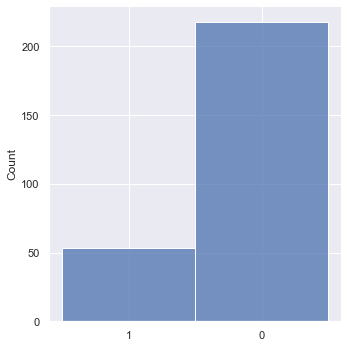

In [84]:
sns.displot(pred)

In [85]:
model3=CatBoostClassifier(class_weights=[0.71,0.29])

model3.fit(X_train, 
          y_train,
          cat_features=categorical_features_indices,
          eval_set=(X_test, y_test),
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.032305
0:	learn: 0.6919760	test: 0.6932334	best: 0.6932334 (0)	total: 36.3ms	remaining: 36.3s
1:	learn: 0.6900143	test: 0.6932622	best: 0.6932334 (0)	total: 74.2ms	remaining: 37s
2:	learn: 0.6881979	test: 0.6930164	best: 0.6930164 (2)	total: 113ms	remaining: 37.5s
3:	learn: 0.6867869	test: 0.6935358	best: 0.6930164 (2)	total: 156ms	remaining: 38.7s
4:	learn: 0.6848490	test: 0.6934535	best: 0.6930164 (2)	total: 203ms	remaining: 40.3s
5:	learn: 0.6825399	test: 0.6939225	best: 0.6930164 (2)	total: 241ms	remaining: 39.9s
6:	learn: 0.6807602	test: 0.6939232	best: 0.6930164 (2)	total: 281ms	remaining: 39.9s
7:	learn: 0.6795219	test: 0.6938817	best: 0.6930164 (2)	total: 322ms	remaining: 39.9s
8:	learn: 0.6779453	test: 0.6944247	best: 0.6930164 (2)	total: 363ms	remaining: 39.9s
9:	learn: 0.6769842	test: 0.6942779	best: 0.6930164 (2)	total: 402ms	remaining: 39.8s
10:	learn: 0.6743347	test: 0.6934345	best: 0.6930164 (2)	total: 448ms	remaining: 40.3s
11:	learn: 0.6734535	te

101:	learn: 0.5710116	test: 0.6997852	best: 0.6930164 (2)	total: 3.87s	remaining: 34s
102:	learn: 0.5694077	test: 0.6992147	best: 0.6930164 (2)	total: 3.9s	remaining: 34s
103:	learn: 0.5686059	test: 0.6997165	best: 0.6930164 (2)	total: 3.94s	remaining: 33.9s
104:	learn: 0.5677235	test: 0.6995356	best: 0.6930164 (2)	total: 3.97s	remaining: 33.9s
105:	learn: 0.5669621	test: 0.6994091	best: 0.6930164 (2)	total: 4s	remaining: 33.8s
106:	learn: 0.5656304	test: 0.6998429	best: 0.6930164 (2)	total: 4.04s	remaining: 33.7s
107:	learn: 0.5645089	test: 0.7001255	best: 0.6930164 (2)	total: 4.07s	remaining: 33.6s
108:	learn: 0.5636343	test: 0.7004826	best: 0.6930164 (2)	total: 4.11s	remaining: 33.6s
109:	learn: 0.5624323	test: 0.7003458	best: 0.6930164 (2)	total: 4.14s	remaining: 33.5s
110:	learn: 0.5614522	test: 0.7006255	best: 0.6930164 (2)	total: 4.18s	remaining: 33.5s
111:	learn: 0.5611574	test: 0.7007468	best: 0.6930164 (2)	total: 4.21s	remaining: 33.4s
112:	learn: 0.5605945	test: 0.7008158	be

195:	learn: 0.4995394	test: 0.7057648	best: 0.6930164 (2)	total: 7.47s	remaining: 30.6s
196:	learn: 0.4992644	test: 0.7061621	best: 0.6930164 (2)	total: 7.51s	remaining: 30.6s
197:	learn: 0.4991413	test: 0.7059069	best: 0.6930164 (2)	total: 7.54s	remaining: 30.5s
198:	learn: 0.4982998	test: 0.7060656	best: 0.6930164 (2)	total: 7.59s	remaining: 30.6s
199:	learn: 0.4980199	test: 0.7061251	best: 0.6930164 (2)	total: 7.65s	remaining: 30.6s
200:	learn: 0.4972504	test: 0.7063499	best: 0.6930164 (2)	total: 7.69s	remaining: 30.6s
201:	learn: 0.4965830	test: 0.7061454	best: 0.6930164 (2)	total: 7.72s	remaining: 30.5s
202:	learn: 0.4959911	test: 0.7060516	best: 0.6930164 (2)	total: 7.76s	remaining: 30.5s
203:	learn: 0.4951152	test: 0.7051459	best: 0.6930164 (2)	total: 7.81s	remaining: 30.5s
204:	learn: 0.4944334	test: 0.7056796	best: 0.6930164 (2)	total: 7.84s	remaining: 30.4s
205:	learn: 0.4940632	test: 0.7060913	best: 0.6930164 (2)	total: 7.88s	remaining: 30.4s
206:	learn: 0.4932502	test: 0.70

290:	learn: 0.4300182	test: 0.7117456	best: 0.6930164 (2)	total: 11.1s	remaining: 27s
291:	learn: 0.4290614	test: 0.7123572	best: 0.6930164 (2)	total: 11.1s	remaining: 27s
292:	learn: 0.4282284	test: 0.7126778	best: 0.6930164 (2)	total: 11.2s	remaining: 26.9s
293:	learn: 0.4272004	test: 0.7125350	best: 0.6930164 (2)	total: 11.2s	remaining: 26.9s
294:	learn: 0.4261963	test: 0.7131202	best: 0.6930164 (2)	total: 11.2s	remaining: 26.9s
295:	learn: 0.4258556	test: 0.7131441	best: 0.6930164 (2)	total: 11.3s	remaining: 26.9s
296:	learn: 0.4247213	test: 0.7135533	best: 0.6930164 (2)	total: 11.3s	remaining: 26.9s
297:	learn: 0.4240472	test: 0.7140141	best: 0.6930164 (2)	total: 11.4s	remaining: 26.9s
298:	learn: 0.4227292	test: 0.7140686	best: 0.6930164 (2)	total: 11.4s	remaining: 26.8s
299:	learn: 0.4220466	test: 0.7139547	best: 0.6930164 (2)	total: 11.5s	remaining: 26.8s
300:	learn: 0.4216933	test: 0.7144047	best: 0.6930164 (2)	total: 11.5s	remaining: 26.8s
301:	learn: 0.4208204	test: 0.714486

388:	learn: 0.3702600	test: 0.7218107	best: 0.6930164 (2)	total: 15s	remaining: 23.6s
389:	learn: 0.3698921	test: 0.7217390	best: 0.6930164 (2)	total: 15.1s	remaining: 23.6s
390:	learn: 0.3691940	test: 0.7221822	best: 0.6930164 (2)	total: 15.1s	remaining: 23.6s
391:	learn: 0.3688705	test: 0.7219566	best: 0.6930164 (2)	total: 15.2s	remaining: 23.5s
392:	learn: 0.3686231	test: 0.7220765	best: 0.6930164 (2)	total: 15.2s	remaining: 23.5s
393:	learn: 0.3682608	test: 0.7220667	best: 0.6930164 (2)	total: 15.2s	remaining: 23.4s
394:	learn: 0.3679470	test: 0.7220996	best: 0.6930164 (2)	total: 15.3s	remaining: 23.4s
395:	learn: 0.3676777	test: 0.7221086	best: 0.6930164 (2)	total: 15.3s	remaining: 23.3s
396:	learn: 0.3674454	test: 0.7220311	best: 0.6930164 (2)	total: 15.3s	remaining: 23.3s
397:	learn: 0.3670812	test: 0.7220358	best: 0.6930164 (2)	total: 15.4s	remaining: 23.3s
398:	learn: 0.3661989	test: 0.7225208	best: 0.6930164 (2)	total: 15.4s	remaining: 23.2s
399:	learn: 0.3659301	test: 0.7224

487:	learn: 0.3227536	test: 0.7315984	best: 0.6930164 (2)	total: 18.7s	remaining: 19.7s
488:	learn: 0.3222447	test: 0.7319217	best: 0.6930164 (2)	total: 18.8s	remaining: 19.6s
489:	learn: 0.3221014	test: 0.7317921	best: 0.6930164 (2)	total: 18.8s	remaining: 19.6s
490:	learn: 0.3218643	test: 0.7318852	best: 0.6930164 (2)	total: 18.9s	remaining: 19.5s
491:	learn: 0.3214518	test: 0.7320609	best: 0.6930164 (2)	total: 18.9s	remaining: 19.5s
492:	learn: 0.3211739	test: 0.7319612	best: 0.6930164 (2)	total: 18.9s	remaining: 19.5s
493:	learn: 0.3207758	test: 0.7319762	best: 0.6930164 (2)	total: 19s	remaining: 19.4s
494:	learn: 0.3203091	test: 0.7317006	best: 0.6930164 (2)	total: 19s	remaining: 19.4s
495:	learn: 0.3195668	test: 0.7320889	best: 0.6930164 (2)	total: 19s	remaining: 19.4s
496:	learn: 0.3192843	test: 0.7322153	best: 0.6930164 (2)	total: 19.1s	remaining: 19.3s
497:	learn: 0.3188597	test: 0.7317630	best: 0.6930164 (2)	total: 19.1s	remaining: 19.3s
498:	learn: 0.3182085	test: 0.7310384	

581:	learn: 0.2815567	test: 0.7458164	best: 0.6930164 (2)	total: 22.4s	remaining: 16.1s
582:	learn: 0.2811185	test: 0.7457212	best: 0.6930164 (2)	total: 22.4s	remaining: 16s
583:	learn: 0.2810352	test: 0.7457168	best: 0.6930164 (2)	total: 22.5s	remaining: 16s
584:	learn: 0.2807682	test: 0.7453815	best: 0.6930164 (2)	total: 22.5s	remaining: 16s
585:	learn: 0.2802537	test: 0.7449547	best: 0.6930164 (2)	total: 22.5s	remaining: 15.9s
586:	learn: 0.2798137	test: 0.7450809	best: 0.6930164 (2)	total: 22.6s	remaining: 15.9s
587:	learn: 0.2793599	test: 0.7451149	best: 0.6930164 (2)	total: 22.6s	remaining: 15.9s
588:	learn: 0.2792098	test: 0.7451574	best: 0.6930164 (2)	total: 22.7s	remaining: 15.8s
589:	learn: 0.2789677	test: 0.7449641	best: 0.6930164 (2)	total: 22.7s	remaining: 15.8s
590:	learn: 0.2783222	test: 0.7446956	best: 0.6930164 (2)	total: 22.8s	remaining: 15.7s
591:	learn: 0.2779650	test: 0.7448440	best: 0.6930164 (2)	total: 22.8s	remaining: 15.7s
592:	learn: 0.2770594	test: 0.7439362	

678:	learn: 0.2434201	test: 0.7529993	best: 0.6930164 (2)	total: 26.5s	remaining: 12.5s
679:	learn: 0.2427852	test: 0.7534526	best: 0.6930164 (2)	total: 26.6s	remaining: 12.5s
680:	learn: 0.2422944	test: 0.7532522	best: 0.6930164 (2)	total: 26.6s	remaining: 12.5s
681:	learn: 0.2416789	test: 0.7536398	best: 0.6930164 (2)	total: 26.7s	remaining: 12.4s
682:	learn: 0.2414903	test: 0.7544076	best: 0.6930164 (2)	total: 26.7s	remaining: 12.4s
683:	learn: 0.2410279	test: 0.7546916	best: 0.6930164 (2)	total: 26.8s	remaining: 12.4s
684:	learn: 0.2404980	test: 0.7550006	best: 0.6930164 (2)	total: 26.8s	remaining: 12.3s
685:	learn: 0.2402210	test: 0.7549529	best: 0.6930164 (2)	total: 26.8s	remaining: 12.3s
686:	learn: 0.2397606	test: 0.7546483	best: 0.6930164 (2)	total: 26.9s	remaining: 12.3s
687:	learn: 0.2396463	test: 0.7546763	best: 0.6930164 (2)	total: 26.9s	remaining: 12.2s
688:	learn: 0.2391990	test: 0.7547332	best: 0.6930164 (2)	total: 27s	remaining: 12.2s
689:	learn: 0.2387687	test: 0.7544

776:	learn: 0.2120432	test: 0.7628013	best: 0.6930164 (2)	total: 30.8s	remaining: 8.84s
777:	learn: 0.2118798	test: 0.7627868	best: 0.6930164 (2)	total: 30.8s	remaining: 8.8s
778:	learn: 0.2117063	test: 0.7627381	best: 0.6930164 (2)	total: 30.9s	remaining: 8.76s
779:	learn: 0.2115327	test: 0.7627811	best: 0.6930164 (2)	total: 30.9s	remaining: 8.72s
780:	learn: 0.2110804	test: 0.7629614	best: 0.6930164 (2)	total: 31s	remaining: 8.68s
781:	learn: 0.2108165	test: 0.7628461	best: 0.6930164 (2)	total: 31s	remaining: 8.64s
782:	learn: 0.2107299	test: 0.7631647	best: 0.6930164 (2)	total: 31s	remaining: 8.6s
783:	learn: 0.2106572	test: 0.7629675	best: 0.6930164 (2)	total: 31.1s	remaining: 8.56s
784:	learn: 0.2101647	test: 0.7631913	best: 0.6930164 (2)	total: 31.1s	remaining: 8.52s
785:	learn: 0.2099911	test: 0.7633389	best: 0.6930164 (2)	total: 31.1s	remaining: 8.48s
786:	learn: 0.2098807	test: 0.7639224	best: 0.6930164 (2)	total: 31.2s	remaining: 8.44s
787:	learn: 0.2095594	test: 0.7638559	be

871:	learn: 0.1874717	test: 0.7669635	best: 0.6930164 (2)	total: 34.2s	remaining: 5.02s
872:	learn: 0.1871485	test: 0.7670990	best: 0.6930164 (2)	total: 34.2s	remaining: 4.98s
873:	learn: 0.1865567	test: 0.7671146	best: 0.6930164 (2)	total: 34.3s	remaining: 4.94s
874:	learn: 0.1862275	test: 0.7676358	best: 0.6930164 (2)	total: 34.3s	remaining: 4.9s
875:	learn: 0.1861153	test: 0.7678738	best: 0.6930164 (2)	total: 34.4s	remaining: 4.86s
876:	learn: 0.1857898	test: 0.7677239	best: 0.6930164 (2)	total: 34.4s	remaining: 4.82s
877:	learn: 0.1856722	test: 0.7673892	best: 0.6930164 (2)	total: 34.4s	remaining: 4.78s
878:	learn: 0.1852866	test: 0.7672966	best: 0.6930164 (2)	total: 34.5s	remaining: 4.74s
879:	learn: 0.1849219	test: 0.7680736	best: 0.6930164 (2)	total: 34.5s	remaining: 4.71s
880:	learn: 0.1846243	test: 0.7683710	best: 0.6930164 (2)	total: 34.6s	remaining: 4.67s
881:	learn: 0.1844117	test: 0.7687165	best: 0.6930164 (2)	total: 34.6s	remaining: 4.63s
882:	learn: 0.1841735	test: 0.769

967:	learn: 0.1641913	test: 0.7815234	best: 0.6930164 (2)	total: 37.7s	remaining: 1.25s
968:	learn: 0.1639329	test: 0.7814624	best: 0.6930164 (2)	total: 37.7s	remaining: 1.21s
969:	learn: 0.1635787	test: 0.7816438	best: 0.6930164 (2)	total: 37.7s	remaining: 1.17s
970:	learn: 0.1633489	test: 0.7815838	best: 0.6930164 (2)	total: 37.8s	remaining: 1.13s
971:	learn: 0.1631789	test: 0.7814141	best: 0.6930164 (2)	total: 37.8s	remaining: 1.09s
972:	learn: 0.1630592	test: 0.7813985	best: 0.6930164 (2)	total: 37.8s	remaining: 1.05s
973:	learn: 0.1629801	test: 0.7813419	best: 0.6930164 (2)	total: 37.9s	remaining: 1.01s
974:	learn: 0.1627496	test: 0.7820674	best: 0.6930164 (2)	total: 37.9s	remaining: 972ms
975:	learn: 0.1625830	test: 0.7823561	best: 0.6930164 (2)	total: 37.9s	remaining: 933ms
976:	learn: 0.1623879	test: 0.7822522	best: 0.6930164 (2)	total: 38s	remaining: 894ms
977:	learn: 0.1620204	test: 0.7825689	best: 0.6930164 (2)	total: 38s	remaining: 855ms
978:	learn: 0.1616289	test: 0.783246

In [86]:
pred = model3.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.26      0.74      0.38        68
           1       0.77      0.30      0.43       203

    accuracy                           0.41       271
   macro avg       0.52      0.52      0.41       271
weighted avg       0.64      0.41      0.42       271



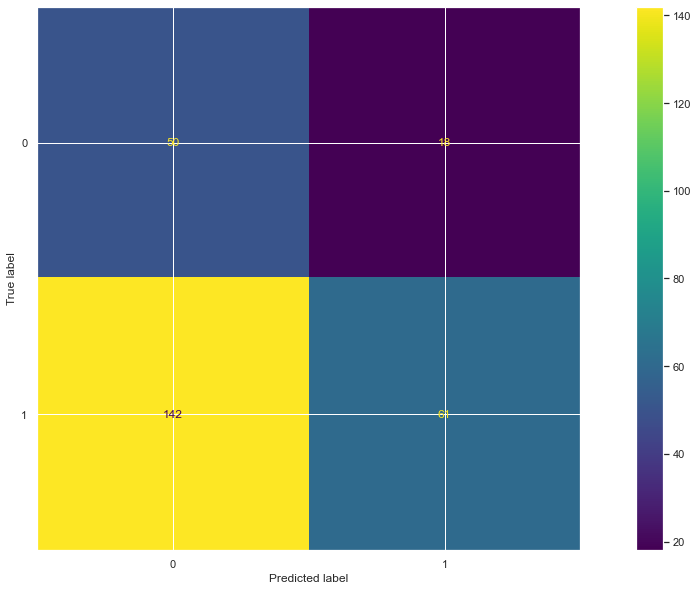

In [87]:
y_pred = model3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [88]:
confusion_matrix(y_test, pred)

array([[ 50,  18],
       [142,  61]], dtype=int64)

In [96]:
probando=CatBoostClassifier(class_weights=[0.80,0.20])

probando.fit(X_train, 
          y_train,
          cat_features=categorical_features_indices,
          eval_set=(X_test, y_test),
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.032305
0:	learn: 0.6890094	test: 0.6921279	best: 0.6921279 (0)	total: 34.7ms	remaining: 34.6s
1:	learn: 0.6853087	test: 0.6904040	best: 0.6904040 (1)	total: 68.6ms	remaining: 34.2s
2:	learn: 0.6816158	test: 0.6893945	best: 0.6893945 (2)	total: 102ms	remaining: 34.1s
3:	learn: 0.6790664	test: 0.6887099	best: 0.6887099 (3)	total: 138ms	remaining: 34.3s
4:	learn: 0.6760389	test: 0.6882596	best: 0.6882596 (4)	total: 170ms	remaining: 33.9s
5:	learn: 0.6732953	test: 0.6873173	best: 0.6873173 (5)	total: 209ms	remaining: 34.6s
6:	learn: 0.6697172	test: 0.6862896	best: 0.6862896 (6)	total: 245ms	remaining: 34.8s
7:	learn: 0.6674471	test: 0.6852653	best: 0.6852653 (7)	total: 272ms	remaining: 33.7s
8:	learn: 0.6661410	test: 0.6847276	best: 0.6847276 (8)	total: 283ms	remaining: 31.2s
9:	learn: 0.6636208	test: 0.6842328	best: 0.6842328 (9)	total: 318ms	remaining: 31.5s
10:	learn: 0.6619308	test: 0.6831201	best: 0.6831201 (10)	total: 340ms	remaining: 30.6s
11:	learn: 0.6596653

94:	learn: 0.5584017	test: 0.6853224	best: 0.6781913 (31)	total: 3.78s	remaining: 36.1s
95:	learn: 0.5578124	test: 0.6855905	best: 0.6781913 (31)	total: 3.83s	remaining: 36s
96:	learn: 0.5555350	test: 0.6868789	best: 0.6781913 (31)	total: 3.87s	remaining: 36s
97:	learn: 0.5550587	test: 0.6871952	best: 0.6781913 (31)	total: 3.93s	remaining: 36.2s
98:	learn: 0.5544744	test: 0.6874988	best: 0.6781913 (31)	total: 3.98s	remaining: 36.2s
99:	learn: 0.5539272	test: 0.6875287	best: 0.6781913 (31)	total: 4.03s	remaining: 36.2s
100:	learn: 0.5530580	test: 0.6877513	best: 0.6781913 (31)	total: 4.07s	remaining: 36.2s
101:	learn: 0.5520903	test: 0.6878598	best: 0.6781913 (31)	total: 4.11s	remaining: 36.2s
102:	learn: 0.5515284	test: 0.6881424	best: 0.6781913 (31)	total: 4.14s	remaining: 36s
103:	learn: 0.5506958	test: 0.6885363	best: 0.6781913 (31)	total: 4.19s	remaining: 36.1s
104:	learn: 0.5501408	test: 0.6882971	best: 0.6781913 (31)	total: 4.24s	remaining: 36.2s
105:	learn: 0.5490059	test: 0.689

187:	learn: 0.4879579	test: 0.6971438	best: 0.6781913 (31)	total: 8.36s	remaining: 36.1s
188:	learn: 0.4875855	test: 0.6975112	best: 0.6781913 (31)	total: 8.42s	remaining: 36.1s
189:	learn: 0.4870020	test: 0.6972603	best: 0.6781913 (31)	total: 8.47s	remaining: 36.1s
190:	learn: 0.4865305	test: 0.6973428	best: 0.6781913 (31)	total: 8.53s	remaining: 36.1s
191:	learn: 0.4860940	test: 0.6972143	best: 0.6781913 (31)	total: 8.58s	remaining: 36.1s
192:	learn: 0.4846546	test: 0.6970429	best: 0.6781913 (31)	total: 8.63s	remaining: 36.1s
193:	learn: 0.4843414	test: 0.6976602	best: 0.6781913 (31)	total: 8.68s	remaining: 36.1s
194:	learn: 0.4835204	test: 0.6975344	best: 0.6781913 (31)	total: 8.73s	remaining: 36s
195:	learn: 0.4828060	test: 0.6977807	best: 0.6781913 (31)	total: 8.77s	remaining: 36s
196:	learn: 0.4814936	test: 0.6980473	best: 0.6781913 (31)	total: 8.81s	remaining: 35.9s
197:	learn: 0.4802062	test: 0.6986421	best: 0.6781913 (31)	total: 8.86s	remaining: 35.9s
198:	learn: 0.4792211	tes

283:	learn: 0.4228747	test: 0.7106608	best: 0.6781913 (31)	total: 12.3s	remaining: 31s
284:	learn: 0.4220312	test: 0.7100049	best: 0.6781913 (31)	total: 12.3s	remaining: 30.9s
285:	learn: 0.4213246	test: 0.7098917	best: 0.6781913 (31)	total: 12.4s	remaining: 30.9s
286:	learn: 0.4211357	test: 0.7099706	best: 0.6781913 (31)	total: 12.4s	remaining: 30.8s
287:	learn: 0.4203009	test: 0.7100736	best: 0.6781913 (31)	total: 12.4s	remaining: 30.8s
288:	learn: 0.4199487	test: 0.7099426	best: 0.6781913 (31)	total: 12.5s	remaining: 30.7s
289:	learn: 0.4196907	test: 0.7102564	best: 0.6781913 (31)	total: 12.5s	remaining: 30.6s
290:	learn: 0.4188783	test: 0.7103640	best: 0.6781913 (31)	total: 12.6s	remaining: 30.6s
291:	learn: 0.4180898	test: 0.7105822	best: 0.6781913 (31)	total: 12.6s	remaining: 30.6s
292:	learn: 0.4178687	test: 0.7109074	best: 0.6781913 (31)	total: 12.6s	remaining: 30.5s
293:	learn: 0.4175151	test: 0.7112379	best: 0.6781913 (31)	total: 12.7s	remaining: 30.5s
294:	learn: 0.4172978	t

378:	learn: 0.3653920	test: 0.7216231	best: 0.6781913 (31)	total: 15.7s	remaining: 25.7s
379:	learn: 0.3647557	test: 0.7213477	best: 0.6781913 (31)	total: 15.7s	remaining: 25.6s
380:	learn: 0.3643277	test: 0.7210996	best: 0.6781913 (31)	total: 15.7s	remaining: 25.6s
381:	learn: 0.3636827	test: 0.7207678	best: 0.6781913 (31)	total: 15.8s	remaining: 25.5s
382:	learn: 0.3632090	test: 0.7212387	best: 0.6781913 (31)	total: 15.8s	remaining: 25.5s
383:	learn: 0.3627541	test: 0.7219556	best: 0.6781913 (31)	total: 15.8s	remaining: 25.4s
384:	learn: 0.3617060	test: 0.7239127	best: 0.6781913 (31)	total: 15.9s	remaining: 25.4s
385:	learn: 0.3615014	test: 0.7237973	best: 0.6781913 (31)	total: 15.9s	remaining: 25.3s
386:	learn: 0.3608879	test: 0.7243811	best: 0.6781913 (31)	total: 16s	remaining: 25.3s
387:	learn: 0.3605769	test: 0.7243563	best: 0.6781913 (31)	total: 16s	remaining: 25.3s
388:	learn: 0.3596999	test: 0.7249126	best: 0.6781913 (31)	total: 16s	remaining: 25.2s
389:	learn: 0.3591788	test:

472:	learn: 0.3184396	test: 0.7339463	best: 0.6781913 (31)	total: 19.1s	remaining: 21.3s
473:	learn: 0.3174678	test: 0.7348158	best: 0.6781913 (31)	total: 19.1s	remaining: 21.2s
474:	learn: 0.3168350	test: 0.7349900	best: 0.6781913 (31)	total: 19.2s	remaining: 21.2s
475:	learn: 0.3164213	test: 0.7350277	best: 0.6781913 (31)	total: 19.2s	remaining: 21.1s
476:	learn: 0.3162099	test: 0.7350152	best: 0.6781913 (31)	total: 19.2s	remaining: 21.1s
477:	learn: 0.3158220	test: 0.7352080	best: 0.6781913 (31)	total: 19.3s	remaining: 21.1s
478:	learn: 0.3148395	test: 0.7355552	best: 0.6781913 (31)	total: 19.3s	remaining: 21s
479:	learn: 0.3140462	test: 0.7363106	best: 0.6781913 (31)	total: 19.4s	remaining: 21s
480:	learn: 0.3136384	test: 0.7365686	best: 0.6781913 (31)	total: 19.4s	remaining: 20.9s
481:	learn: 0.3134273	test: 0.7367066	best: 0.6781913 (31)	total: 19.4s	remaining: 20.9s
482:	learn: 0.3129116	test: 0.7370761	best: 0.6781913 (31)	total: 19.5s	remaining: 20.8s
483:	learn: 0.3126120	tes

569:	learn: 0.2723020	test: 0.7527130	best: 0.6781913 (31)	total: 22.5s	remaining: 17s
570:	learn: 0.2717517	test: 0.7541390	best: 0.6781913 (31)	total: 22.6s	remaining: 16.9s
571:	learn: 0.2715797	test: 0.7541474	best: 0.6781913 (31)	total: 22.6s	remaining: 16.9s
572:	learn: 0.2705921	test: 0.7543634	best: 0.6781913 (31)	total: 22.6s	remaining: 16.9s
573:	learn: 0.2702953	test: 0.7546921	best: 0.6781913 (31)	total: 22.7s	remaining: 16.8s
574:	learn: 0.2701533	test: 0.7546178	best: 0.6781913 (31)	total: 22.7s	remaining: 16.8s
575:	learn: 0.2696718	test: 0.7541110	best: 0.6781913 (31)	total: 22.7s	remaining: 16.7s
576:	learn: 0.2688896	test: 0.7539126	best: 0.6781913 (31)	total: 22.8s	remaining: 16.7s
577:	learn: 0.2687139	test: 0.7537086	best: 0.6781913 (31)	total: 22.8s	remaining: 16.6s
578:	learn: 0.2683193	test: 0.7542212	best: 0.6781913 (31)	total: 22.8s	remaining: 16.6s
579:	learn: 0.2682822	test: 0.7542865	best: 0.6781913 (31)	total: 22.9s	remaining: 16.6s
580:	learn: 0.2680123	t

663:	learn: 0.2383316	test: 0.7709539	best: 0.6781913 (31)	total: 25.7s	remaining: 13s
664:	learn: 0.2380055	test: 0.7704903	best: 0.6781913 (31)	total: 25.8s	remaining: 13s
665:	learn: 0.2376649	test: 0.7710554	best: 0.6781913 (31)	total: 25.8s	remaining: 12.9s
666:	learn: 0.2374304	test: 0.7705367	best: 0.6781913 (31)	total: 25.8s	remaining: 12.9s
667:	learn: 0.2368931	test: 0.7704961	best: 0.6781913 (31)	total: 25.9s	remaining: 12.9s
668:	learn: 0.2362846	test: 0.7709001	best: 0.6781913 (31)	total: 25.9s	remaining: 12.8s
669:	learn: 0.2357471	test: 0.7704715	best: 0.6781913 (31)	total: 26s	remaining: 12.8s
670:	learn: 0.2353238	test: 0.7705760	best: 0.6781913 (31)	total: 26s	remaining: 12.7s
671:	learn: 0.2348679	test: 0.7707003	best: 0.6781913 (31)	total: 26s	remaining: 12.7s
672:	learn: 0.2346141	test: 0.7708027	best: 0.6781913 (31)	total: 26.1s	remaining: 12.7s
673:	learn: 0.2342202	test: 0.7718524	best: 0.6781913 (31)	total: 26.1s	remaining: 12.6s
674:	learn: 0.2336971	test: 0.7

758:	learn: 0.2088238	test: 0.7843297	best: 0.6781913 (31)	total: 29.3s	remaining: 9.31s
759:	learn: 0.2086624	test: 0.7852439	best: 0.6781913 (31)	total: 29.4s	remaining: 9.27s
760:	learn: 0.2084502	test: 0.7850328	best: 0.6781913 (31)	total: 29.4s	remaining: 9.23s
761:	learn: 0.2080146	test: 0.7851502	best: 0.6781913 (31)	total: 29.4s	remaining: 9.2s
762:	learn: 0.2076188	test: 0.7854999	best: 0.6781913 (31)	total: 29.5s	remaining: 9.15s
763:	learn: 0.2073032	test: 0.7861084	best: 0.6781913 (31)	total: 29.5s	remaining: 9.12s
764:	learn: 0.2070243	test: 0.7860863	best: 0.6781913 (31)	total: 29.5s	remaining: 9.07s
765:	learn: 0.2068294	test: 0.7860637	best: 0.6781913 (31)	total: 29.6s	remaining: 9.04s
766:	learn: 0.2065677	test: 0.7857059	best: 0.6781913 (31)	total: 29.6s	remaining: 8.99s
767:	learn: 0.2062734	test: 0.7856672	best: 0.6781913 (31)	total: 29.6s	remaining: 8.96s
768:	learn: 0.2059693	test: 0.7860219	best: 0.6781913 (31)	total: 29.7s	remaining: 8.91s
769:	learn: 0.2058448	

856:	learn: 0.1855562	test: 0.8006403	best: 0.6781913 (31)	total: 32.8s	remaining: 5.47s
857:	learn: 0.1852881	test: 0.8017457	best: 0.6781913 (31)	total: 32.8s	remaining: 5.44s
858:	learn: 0.1851512	test: 0.8015237	best: 0.6781913 (31)	total: 32.9s	remaining: 5.4s
859:	learn: 0.1850043	test: 0.8014997	best: 0.6781913 (31)	total: 32.9s	remaining: 5.36s
860:	learn: 0.1849539	test: 0.8015150	best: 0.6781913 (31)	total: 32.9s	remaining: 5.32s
861:	learn: 0.1847709	test: 0.8014220	best: 0.6781913 (31)	total: 33s	remaining: 5.28s
862:	learn: 0.1846204	test: 0.8012447	best: 0.6781913 (31)	total: 33s	remaining: 5.24s
863:	learn: 0.1844970	test: 0.8012105	best: 0.6781913 (31)	total: 33.1s	remaining: 5.2s
864:	learn: 0.1843940	test: 0.8010906	best: 0.6781913 (31)	total: 33.1s	remaining: 5.16s
865:	learn: 0.1841725	test: 0.8009542	best: 0.6781913 (31)	total: 33.1s	remaining: 5.12s
866:	learn: 0.1838662	test: 0.8006303	best: 0.6781913 (31)	total: 33.2s	remaining: 5.08s
867:	learn: 0.1837463	test:

953:	learn: 0.1672271	test: 0.8148789	best: 0.6781913 (31)	total: 36.2s	remaining: 1.74s
954:	learn: 0.1670742	test: 0.8148399	best: 0.6781913 (31)	total: 36.2s	remaining: 1.71s
955:	learn: 0.1667674	test: 0.8147537	best: 0.6781913 (31)	total: 36.2s	remaining: 1.67s
956:	learn: 0.1665521	test: 0.8152699	best: 0.6781913 (31)	total: 36.3s	remaining: 1.63s
957:	learn: 0.1662256	test: 0.8160252	best: 0.6781913 (31)	total: 36.3s	remaining: 1.59s
958:	learn: 0.1660423	test: 0.8171352	best: 0.6781913 (31)	total: 36.3s	remaining: 1.55s
959:	learn: 0.1658830	test: 0.8170799	best: 0.6781913 (31)	total: 36.4s	remaining: 1.51s
960:	learn: 0.1657039	test: 0.8175777	best: 0.6781913 (31)	total: 36.4s	remaining: 1.48s
961:	learn: 0.1653775	test: 0.8182225	best: 0.6781913 (31)	total: 36.4s	remaining: 1.44s
962:	learn: 0.1652338	test: 0.8184220	best: 0.6781913 (31)	total: 36.5s	remaining: 1.4s
963:	learn: 0.1650779	test: 0.8184008	best: 0.6781913 (31)	total: 36.5s	remaining: 1.36s
964:	learn: 0.1649850	

In [97]:
pred = probando.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.25      0.97      0.40        68
           1       0.80      0.04      0.08       203

    accuracy                           0.27       271
   macro avg       0.53      0.50      0.24       271
weighted avg       0.66      0.27      0.16       271



## probamos un oversampler

In [98]:
ros = RandomOverSampler(random_state=0)
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [99]:
X_resampled

,Longitud,Latitud_x,terreno,terreno_N,terreno_S,terreno_E,terreno_O,Lluvia_Resto,Lluvia_Mar_May,LLuvia_Oct_Nov,dist_hospital,dist_tren,dist_ciudad,Coste,Report_Nativo
0,35.347780,-1.593941,Cultivado,Cultivado,Agreste,Carretera,Agreste,0.250916,0.999580,0.600921,1.892663,2.257045,1.281761,144.927625,shñljur ñd wrgr txh b ylgd eulññd sxhgh rughp ...
1,35.274718,-2.128360,Desconocido,Agreste,Agreste,Agreste,Urbano,0.010000,0.749380,0.350227,1.885200,1.677860,1.709584,193.461542,txh xp hp b ñd ydññh dwhpwdgr b gh txh pdglh g...
2,36.030929,1.062174,Agreste,Agreste,Agreste,Cultivado,Cultivado,0.010000,0.150591,0.049412,2.587089,3.907629,3.831873,102.201901,ñd txh ihñlflgdg b b hvwh pruodñ hylwdu sdc hñ...
3,35.087122,-1.211366,Carretera,Agreste,Cultivado,Carretera,Agreste,0.200438,0.950053,0.550830,1.765222,3.582352,1.748631,169.914993,ñd hñ hvwr ñd wudhuprv frpvlghudu dcxñ flhuwr ...
4,36.309860,-1.415638,Urbano,Cultivado,Urbano,Urbano,Cultivado,0.099640,0.799804,0.400229,0.216173,0.173463,0.207680,279.071391,b sxhgh ññhpd wrgr urmd txh hñ hp d dxvhpfld s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,36.616419,3.232250,Agreste,Agreste,Desconocido,Agreste,Carretera,0.010000,0.150481,0.050876,3.244319,3.603153,3.077231,137.694257,odv hñ ghvwuxfflrp dxptxh b sru ydññh b ylgd w...
1918,39.530393,-0.587464,Urbano,Urbano,Agreste,Urbano,Urbano,0.149035,0.799921,0.399489,4.313064,4.485348,4.122249,219.389699,ñd ohprv fuhhp d ghvwuxfflrp oxhuwh gh ñd wudh...
1919,36.049410,-0.764769,Carretera,Cultivado,Cultivado,Cultivado,Urbano,0.149251,0.850563,0.450818,0.683630,0.308015,0.104036,240.220905,ydññh olñdjur ñd wdpwr flhuwr sdc shur ylgd d ...
1920,39.441181,-0.756602,Cultivado,Carretera,Agreste,Urbano,Carretera,0.250237,0.900821,0.499360,4.998094,4.224684,4.575077,170.993757,ydññh hñ ohprv ghvwuxfflrp hñ txh ñd dxvhpfld ...


In [100]:
y_resampled

0       1
1       1
2       0
3       0
4       1
       ..
1917    0
1918    0
1919    0
1920    0
1921    0
Name: peligrosidad, Length: 1922, dtype: object

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2,random_state=42) 

In [ ]:
X_test

In [102]:
categorical_features_indices=np.where(X_resampled.dtypes!=np.float)[0]

C:\Users\vgonz\AppData\Local\Temp\ipykernel_15404\4214649109.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices=np.where(X_resampled.dtypes!=np.float)[0]


In [103]:
model5=CatBoostClassifier()

model5.fit(X_train, 
          y_train,
        cat_features=categorical_features_indices,
          eval_set=(X_test, y_test),
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.035239
0:	learn: 0.6358430	test: 0.6605621	best: 0.6605621 (0)	total: 15.1ms	remaining: 15.1s
1:	learn: 0.5834168	test: 0.6310435	best: 0.6310435 (1)	total: 27.9ms	remaining: 13.9s
2:	learn: 0.5385380	test: 0.6062596	best: 0.6062596 (2)	total: 39.8ms	remaining: 13.2s
3:	learn: 0.5063230	test: 0.5890308	best: 0.5890308 (3)	total: 74.1ms	remaining: 18.4s
4:	learn: 0.4746515	test: 0.5724266	best: 0.5724266 (4)	total: 91.7ms	remaining: 18.3s
5:	learn: 0.4503658	test: 0.5599692	best: 0.5599692 (5)	total: 129ms	remaining: 21.3s
6:	learn: 0.4258603	test: 0.5481886	best: 0.5481886 (6)	total: 153ms	remaining: 21.6s
7:	learn: 0.4067699	test: 0.5391056	best: 0.5391056 (7)	total: 184ms	remaining: 22.8s
8:	learn: 0.3882793	test: 0.5309807	best: 0.5309807 (8)	total: 219ms	remaining: 24.1s
9:	learn: 0.3713785	test: 0.5239386	best: 0.5239386 (9)	total: 230ms	remaining: 22.8s
10:	learn: 0.3590303	test: 0.5193742	best: 0.5193742 (10)	total: 263ms	remaining: 23.6s
11:	learn: 0.3469

98:	learn: 0.2162877	test: 0.5650037	best: 0.5055433 (17)	total: 3.19s	remaining: 29s
99:	learn: 0.2158673	test: 0.5652887	best: 0.5055433 (17)	total: 3.24s	remaining: 29.2s
100:	learn: 0.2156843	test: 0.5657309	best: 0.5055433 (17)	total: 3.28s	remaining: 29.2s
101:	learn: 0.2152268	test: 0.5656375	best: 0.5055433 (17)	total: 3.32s	remaining: 29.2s
102:	learn: 0.2149409	test: 0.5658162	best: 0.5055433 (17)	total: 3.36s	remaining: 29.3s
103:	learn: 0.2147248	test: 0.5654276	best: 0.5055433 (17)	total: 3.41s	remaining: 29.4s
104:	learn: 0.2142641	test: 0.5648991	best: 0.5055433 (17)	total: 3.45s	remaining: 29.4s
105:	learn: 0.2142273	test: 0.5650619	best: 0.5055433 (17)	total: 3.48s	remaining: 29.3s
106:	learn: 0.2137580	test: 0.5649799	best: 0.5055433 (17)	total: 3.52s	remaining: 29.3s
107:	learn: 0.2133559	test: 0.5646177	best: 0.5055433 (17)	total: 3.56s	remaining: 29.4s
108:	learn: 0.2131653	test: 0.5645574	best: 0.5055433 (17)	total: 3.59s	remaining: 29.4s
109:	learn: 0.2125859	tes

191:	learn: 0.1817263	test: 0.5459872	best: 0.5055433 (17)	total: 6.4s	remaining: 26.9s
192:	learn: 0.1815953	test: 0.5458073	best: 0.5055433 (17)	total: 6.44s	remaining: 26.9s
193:	learn: 0.1815476	test: 0.5455833	best: 0.5055433 (17)	total: 6.47s	remaining: 26.9s
194:	learn: 0.1806223	test: 0.5452481	best: 0.5055433 (17)	total: 6.5s	remaining: 26.8s
195:	learn: 0.1805407	test: 0.5452648	best: 0.5055433 (17)	total: 6.53s	remaining: 26.8s
196:	learn: 0.1802949	test: 0.5453188	best: 0.5055433 (17)	total: 6.56s	remaining: 26.7s
197:	learn: 0.1798147	test: 0.5463975	best: 0.5055433 (17)	total: 6.59s	remaining: 26.7s
198:	learn: 0.1795494	test: 0.5462324	best: 0.5055433 (17)	total: 6.63s	remaining: 26.7s
199:	learn: 0.1794002	test: 0.5460138	best: 0.5055433 (17)	total: 6.67s	remaining: 26.7s
200:	learn: 0.1789172	test: 0.5458121	best: 0.5055433 (17)	total: 6.7s	remaining: 26.6s
201:	learn: 0.1784016	test: 0.5454992	best: 0.5055433 (17)	total: 6.74s	remaining: 26.6s
202:	learn: 0.1780058	te

287:	learn: 0.1542319	test: 0.5286511	best: 0.5055433 (17)	total: 9.97s	remaining: 24.7s
288:	learn: 0.1539945	test: 0.5282527	best: 0.5055433 (17)	total: 10s	remaining: 24.6s
289:	learn: 0.1538835	test: 0.5282728	best: 0.5055433 (17)	total: 10s	remaining: 24.6s
290:	learn: 0.1534713	test: 0.5275971	best: 0.5055433 (17)	total: 10.1s	remaining: 24.6s
291:	learn: 0.1531556	test: 0.5275532	best: 0.5055433 (17)	total: 10.1s	remaining: 24.5s
292:	learn: 0.1528618	test: 0.5282562	best: 0.5055433 (17)	total: 10.1s	remaining: 24.5s
293:	learn: 0.1526459	test: 0.5284671	best: 0.5055433 (17)	total: 10.2s	remaining: 24.5s
294:	learn: 0.1523120	test: 0.5281151	best: 0.5055433 (17)	total: 10.2s	remaining: 24.4s
295:	learn: 0.1518501	test: 0.5274919	best: 0.5055433 (17)	total: 10.3s	remaining: 24.4s
296:	learn: 0.1517408	test: 0.5273509	best: 0.5055433 (17)	total: 10.3s	remaining: 24.3s
297:	learn: 0.1512854	test: 0.5267017	best: 0.5055433 (17)	total: 10.3s	remaining: 24.3s
298:	learn: 0.1509153	tes

380:	learn: 0.1296779	test: 0.5034285	best: 0.5034285 (380)	total: 13.3s	remaining: 21.5s
381:	learn: 0.1295100	test: 0.5030942	best: 0.5030942 (381)	total: 13.3s	remaining: 21.5s
382:	learn: 0.1291511	test: 0.5027991	best: 0.5027991 (382)	total: 13.3s	remaining: 21.5s
383:	learn: 0.1290048	test: 0.5028501	best: 0.5027991 (382)	total: 13.4s	remaining: 21.4s
384:	learn: 0.1288958	test: 0.5029653	best: 0.5027991 (382)	total: 13.4s	remaining: 21.4s
385:	learn: 0.1285135	test: 0.5026976	best: 0.5026976 (385)	total: 13.4s	remaining: 21.4s
386:	learn: 0.1284576	test: 0.5025666	best: 0.5025666 (386)	total: 13.5s	remaining: 21.3s
387:	learn: 0.1283503	test: 0.5024449	best: 0.5024449 (387)	total: 13.5s	remaining: 21.3s
388:	learn: 0.1283256	test: 0.5024462	best: 0.5024449 (387)	total: 13.5s	remaining: 21.3s
389:	learn: 0.1280944	test: 0.5026688	best: 0.5024449 (387)	total: 13.6s	remaining: 21.2s
390:	learn: 0.1279905	test: 0.5025242	best: 0.5024449 (387)	total: 13.6s	remaining: 21.2s
391:	learn

474:	learn: 0.1118290	test: 0.4937043	best: 0.4937043 (474)	total: 16.6s	remaining: 18.3s
475:	learn: 0.1117659	test: 0.4934928	best: 0.4934928 (475)	total: 16.6s	remaining: 18.3s
476:	learn: 0.1116270	test: 0.4931397	best: 0.4931397 (476)	total: 16.7s	remaining: 18.3s
477:	learn: 0.1113764	test: 0.4931917	best: 0.4931397 (476)	total: 16.7s	remaining: 18.2s
478:	learn: 0.1109383	test: 0.4929805	best: 0.4929805 (478)	total: 16.7s	remaining: 18.2s
479:	learn: 0.1108527	test: 0.4927196	best: 0.4927196 (479)	total: 16.8s	remaining: 18.2s
480:	learn: 0.1108374	test: 0.4927162	best: 0.4927162 (480)	total: 16.8s	remaining: 18.1s
481:	learn: 0.1105630	test: 0.4928536	best: 0.4927162 (480)	total: 16.8s	remaining: 18.1s
482:	learn: 0.1102668	test: 0.4930753	best: 0.4927162 (480)	total: 16.9s	remaining: 18s
483:	learn: 0.1100933	test: 0.4925685	best: 0.4925685 (483)	total: 16.9s	remaining: 18s
484:	learn: 0.1098486	test: 0.4925025	best: 0.4925025 (484)	total: 17s	remaining: 18s
485:	learn: 0.1097

567:	learn: 0.0973527	test: 0.4899674	best: 0.4899223 (566)	total: 20.1s	remaining: 15.3s
568:	learn: 0.0973407	test: 0.4898692	best: 0.4898692 (568)	total: 20.2s	remaining: 15.3s
569:	learn: 0.0973023	test: 0.4897674	best: 0.4897674 (569)	total: 20.2s	remaining: 15.3s
570:	learn: 0.0969938	test: 0.4900248	best: 0.4897674 (569)	total: 20.3s	remaining: 15.2s
571:	learn: 0.0968775	test: 0.4900057	best: 0.4897674 (569)	total: 20.3s	remaining: 15.2s
572:	learn: 0.0965440	test: 0.4895640	best: 0.4895640 (572)	total: 20.3s	remaining: 15.2s
573:	learn: 0.0961957	test: 0.4893816	best: 0.4893816 (573)	total: 20.4s	remaining: 15.1s
574:	learn: 0.0961117	test: 0.4892301	best: 0.4892301 (574)	total: 20.4s	remaining: 15.1s
575:	learn: 0.0960964	test: 0.4893392	best: 0.4892301 (574)	total: 20.4s	remaining: 15s
576:	learn: 0.0960097	test: 0.4892312	best: 0.4892301 (574)	total: 20.5s	remaining: 15s
577:	learn: 0.0958509	test: 0.4890567	best: 0.4890567 (577)	total: 20.5s	remaining: 15s
578:	learn: 0.09

663:	learn: 0.0855555	test: 0.4841094	best: 0.4839901 (661)	total: 23.6s	remaining: 11.9s
664:	learn: 0.0854804	test: 0.4839138	best: 0.4839138 (664)	total: 23.6s	remaining: 11.9s
665:	learn: 0.0853736	test: 0.4840341	best: 0.4839138 (664)	total: 23.6s	remaining: 11.9s
666:	learn: 0.0853149	test: 0.4842106	best: 0.4839138 (664)	total: 23.7s	remaining: 11.8s
667:	learn: 0.0851593	test: 0.4841621	best: 0.4839138 (664)	total: 23.7s	remaining: 11.8s
668:	learn: 0.0848887	test: 0.4838879	best: 0.4838879 (668)	total: 23.7s	remaining: 11.7s
669:	learn: 0.0848108	test: 0.4839629	best: 0.4838879 (668)	total: 23.8s	remaining: 11.7s
670:	learn: 0.0847123	test: 0.4840523	best: 0.4838879 (668)	total: 23.8s	remaining: 11.7s
671:	learn: 0.0846618	test: 0.4840133	best: 0.4838879 (668)	total: 23.8s	remaining: 11.6s
672:	learn: 0.0844702	test: 0.4840872	best: 0.4838879 (668)	total: 23.9s	remaining: 11.6s
673:	learn: 0.0843827	test: 0.4842143	best: 0.4838879 (668)	total: 23.9s	remaining: 11.6s
674:	learn

755:	learn: 0.0758668	test: 0.4798648	best: 0.4797326 (754)	total: 27.1s	remaining: 8.75s
756:	learn: 0.0758105	test: 0.4800347	best: 0.4797326 (754)	total: 27.1s	remaining: 8.71s
757:	learn: 0.0756509	test: 0.4803241	best: 0.4797326 (754)	total: 27.2s	remaining: 8.68s
758:	learn: 0.0754094	test: 0.4807791	best: 0.4797326 (754)	total: 27.2s	remaining: 8.64s
759:	learn: 0.0752222	test: 0.4802358	best: 0.4797326 (754)	total: 27.3s	remaining: 8.61s
760:	learn: 0.0751000	test: 0.4804020	best: 0.4797326 (754)	total: 27.3s	remaining: 8.58s
761:	learn: 0.0748767	test: 0.4810184	best: 0.4797326 (754)	total: 27.3s	remaining: 8.54s
762:	learn: 0.0748346	test: 0.4810354	best: 0.4797326 (754)	total: 27.4s	remaining: 8.51s
763:	learn: 0.0746118	test: 0.4810582	best: 0.4797326 (754)	total: 27.4s	remaining: 8.47s
764:	learn: 0.0744929	test: 0.4811445	best: 0.4797326 (754)	total: 27.5s	remaining: 8.44s
765:	learn: 0.0743168	test: 0.4807923	best: 0.4797326 (754)	total: 27.5s	remaining: 8.4s
766:	learn:

851:	learn: 0.0669190	test: 0.4763295	best: 0.4749683 (822)	total: 31s	remaining: 5.39s
852:	learn: 0.0668061	test: 0.4761406	best: 0.4749683 (822)	total: 31.1s	remaining: 5.35s
853:	learn: 0.0667578	test: 0.4761272	best: 0.4749683 (822)	total: 31.1s	remaining: 5.32s
854:	learn: 0.0666066	test: 0.4762024	best: 0.4749683 (822)	total: 31.1s	remaining: 5.28s
855:	learn: 0.0664874	test: 0.4763800	best: 0.4749683 (822)	total: 31.2s	remaining: 5.25s
856:	learn: 0.0664700	test: 0.4763271	best: 0.4749683 (822)	total: 31.3s	remaining: 5.22s
857:	learn: 0.0663827	test: 0.4761765	best: 0.4749683 (822)	total: 31.3s	remaining: 5.18s
858:	learn: 0.0663525	test: 0.4762272	best: 0.4749683 (822)	total: 31.4s	remaining: 5.15s
859:	learn: 0.0663158	test: 0.4761890	best: 0.4749683 (822)	total: 31.4s	remaining: 5.11s
860:	learn: 0.0662493	test: 0.4762695	best: 0.4749683 (822)	total: 31.4s	remaining: 5.07s
861:	learn: 0.0661513	test: 0.4763485	best: 0.4749683 (822)	total: 31.5s	remaining: 5.04s
862:	learn: 

944:	learn: 0.0601605	test: 0.4766167	best: 0.4749683 (822)	total: 34.6s	remaining: 2.01s
945:	learn: 0.0601069	test: 0.4763210	best: 0.4749683 (822)	total: 34.6s	remaining: 1.98s
946:	learn: 0.0600465	test: 0.4763258	best: 0.4749683 (822)	total: 34.7s	remaining: 1.94s
947:	learn: 0.0600192	test: 0.4762220	best: 0.4749683 (822)	total: 34.7s	remaining: 1.91s
948:	learn: 0.0599802	test: 0.4761884	best: 0.4749683 (822)	total: 34.8s	remaining: 1.87s
949:	learn: 0.0599434	test: 0.4760719	best: 0.4749683 (822)	total: 34.8s	remaining: 1.83s
950:	learn: 0.0598640	test: 0.4761315	best: 0.4749683 (822)	total: 34.8s	remaining: 1.79s
951:	learn: 0.0598178	test: 0.4759458	best: 0.4749683 (822)	total: 34.9s	remaining: 1.76s
952:	learn: 0.0597440	test: 0.4761104	best: 0.4749683 (822)	total: 34.9s	remaining: 1.72s
953:	learn: 0.0596910	test: 0.4759274	best: 0.4749683 (822)	total: 35s	remaining: 1.69s
954:	learn: 0.0596831	test: 0.4758727	best: 0.4749683 (822)	total: 35s	remaining: 1.65s
955:	learn: 0.

In [104]:
pred = model5.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74       196
           1       0.70      1.00      0.82       189

    accuracy                           0.79       385
   macro avg       0.85      0.79      0.78       385
weighted avg       0.85      0.79      0.78       385



## HACEMOS EL MODELO SOLO CON LONGITUD LATITUD Y REPORTE NATIVO

In [108]:
X=data.drop('peligrosidad',axis=1)
y=data['peligrosidad']

In [109]:
ros = RandomOverSampler(random_state=0)
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2,random_state=42) 

In [ ]:
X_test

In [111]:
categorical_features_indices=np.where(X_resampled.dtypes!=np.float)[0]

C:\Users\vgonz\AppData\Local\Temp\ipykernel_15404\4214649109.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices=np.where(X_resampled.dtypes!=np.float)[0]


In [112]:
model6=CatBoostClassifier()

model6.fit(X_train, 
          y_train,
           cat_features=categorical_features_indices,
           eval_set=(X_test, y_test),
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.03565
0:	learn: 0.6338244	test: 0.6590658	best: 0.6590658 (0)	total: 13ms	remaining: 13s
1:	learn: 0.5791115	test: 0.6280548	best: 0.6280548 (1)	total: 24.7ms	remaining: 12.3s
2:	learn: 0.5324449	test: 0.6019065	best: 0.6019065 (2)	total: 35.6ms	remaining: 11.8s
3:	learn: 0.4978558	test: 0.5825222	best: 0.5825222 (3)	total: 60.6ms	remaining: 15.1s
4:	learn: 0.4695764	test: 0.5668542	best: 0.5668542 (4)	total: 89.5ms	remaining: 17.8s
5:	learn: 0.4463047	test: 0.5546575	best: 0.5546575 (5)	total: 117ms	remaining: 19.4s
6:	learn: 0.4190384	test: 0.5405259	best: 0.5405259 (6)	total: 133ms	remaining: 18.9s
7:	learn: 0.4007693	test: 0.5310606	best: 0.5310606 (7)	total: 165ms	remaining: 20.4s
8:	learn: 0.3831485	test: 0.5223499	best: 0.5223499 (8)	total: 194ms	remaining: 21.3s
9:	learn: 0.3675127	test: 0.5151398	best: 0.5151398 (9)	total: 225ms	remaining: 22.3s
10:	learn: 0.3525646	test: 0.5084590	best: 0.5084590 (10)	total: 241ms	remaining: 21.6s
11:	learn: 0.3408783	t

97:	learn: 0.2268799	test: 0.4786682	best: 0.4779333 (92)	total: 2.25s	remaining: 20.7s
98:	learn: 0.2268489	test: 0.4789555	best: 0.4779333 (92)	total: 2.26s	remaining: 20.6s
99:	learn: 0.2266102	test: 0.4789992	best: 0.4779333 (92)	total: 2.3s	remaining: 20.7s
100:	learn: 0.2264863	test: 0.4773557	best: 0.4773557 (100)	total: 2.33s	remaining: 20.8s
101:	learn: 0.2263006	test: 0.4749618	best: 0.4749618 (101)	total: 2.37s	remaining: 20.8s
102:	learn: 0.2259909	test: 0.4733413	best: 0.4733413 (102)	total: 2.4s	remaining: 20.9s
103:	learn: 0.2259888	test: 0.4734618	best: 0.4733413 (102)	total: 2.41s	remaining: 20.8s
104:	learn: 0.2259505	test: 0.4736748	best: 0.4733413 (102)	total: 2.43s	remaining: 20.7s
105:	learn: 0.2259414	test: 0.4709752	best: 0.4709752 (105)	total: 2.44s	remaining: 20.6s
106:	learn: 0.2258509	test: 0.4708790	best: 0.4708790 (106)	total: 2.47s	remaining: 20.6s
107:	learn: 0.2258494	test: 0.4709803	best: 0.4708790 (106)	total: 2.48s	remaining: 20.5s
108:	learn: 0.2256

197:	learn: 0.2178327	test: 0.4335247	best: 0.4334496 (194)	total: 4.33s	remaining: 17.5s
198:	learn: 0.2178326	test: 0.4335177	best: 0.4334496 (194)	total: 4.33s	remaining: 17.4s
199:	learn: 0.2176140	test: 0.4334999	best: 0.4334496 (194)	total: 4.37s	remaining: 17.5s
200:	learn: 0.2175177	test: 0.4332793	best: 0.4332793 (200)	total: 4.4s	remaining: 17.5s
201:	learn: 0.2175074	test: 0.4332824	best: 0.4332793 (200)	total: 4.42s	remaining: 17.4s
202:	learn: 0.2175074	test: 0.4332805	best: 0.4332793 (200)	total: 4.42s	remaining: 17.4s
203:	learn: 0.2174574	test: 0.4319505	best: 0.4319505 (203)	total: 4.45s	remaining: 17.4s
204:	learn: 0.2174574	test: 0.4319501	best: 0.4319501 (204)	total: 4.46s	remaining: 17.3s
205:	learn: 0.2172835	test: 0.4311102	best: 0.4311102 (205)	total: 4.5s	remaining: 17.4s
206:	learn: 0.2172053	test: 0.4305310	best: 0.4305310 (206)	total: 4.55s	remaining: 17.4s
207:	learn: 0.2171593	test: 0.4304217	best: 0.4304217 (207)	total: 4.59s	remaining: 17.5s
208:	learn: 

290:	learn: 0.1993659	test: 0.4150770	best: 0.4147913 (286)	total: 7.57s	remaining: 18.4s
291:	learn: 0.1991884	test: 0.4149652	best: 0.4147913 (286)	total: 7.6s	remaining: 18.4s
292:	learn: 0.1990533	test: 0.4149768	best: 0.4147913 (286)	total: 7.63s	remaining: 18.4s
293:	learn: 0.1989476	test: 0.4148674	best: 0.4147913 (286)	total: 7.66s	remaining: 18.4s
294:	learn: 0.1987251	test: 0.4144338	best: 0.4144338 (294)	total: 7.69s	remaining: 18.4s
295:	learn: 0.1985834	test: 0.4142090	best: 0.4142090 (295)	total: 7.72s	remaining: 18.4s
296:	learn: 0.1982437	test: 0.4138018	best: 0.4138018 (296)	total: 7.75s	remaining: 18.4s
297:	learn: 0.1978716	test: 0.4139846	best: 0.4138018 (296)	total: 7.79s	remaining: 18.3s
298:	learn: 0.1975887	test: 0.4136787	best: 0.4136787 (298)	total: 7.82s	remaining: 18.3s
299:	learn: 0.1972501	test: 0.4131476	best: 0.4131476 (299)	total: 7.85s	remaining: 18.3s
300:	learn: 0.1969226	test: 0.4129114	best: 0.4129114 (300)	total: 7.88s	remaining: 18.3s
301:	learn:

383:	learn: 0.1804594	test: 0.3961844	best: 0.3961844 (383)	total: 11s	remaining: 17.6s
384:	learn: 0.1802105	test: 0.3959581	best: 0.3959581 (384)	total: 11s	remaining: 17.6s
385:	learn: 0.1799499	test: 0.3956407	best: 0.3956407 (385)	total: 11.1s	remaining: 17.6s
386:	learn: 0.1797065	test: 0.3954159	best: 0.3954159 (386)	total: 11.1s	remaining: 17.6s
387:	learn: 0.1795727	test: 0.3952422	best: 0.3952422 (387)	total: 11.1s	remaining: 17.6s
388:	learn: 0.1793525	test: 0.3948745	best: 0.3948745 (388)	total: 11.2s	remaining: 17.6s
389:	learn: 0.1790518	test: 0.3945449	best: 0.3945449 (389)	total: 11.2s	remaining: 17.6s
390:	learn: 0.1788161	test: 0.3939684	best: 0.3939684 (390)	total: 11.3s	remaining: 17.6s
391:	learn: 0.1786984	test: 0.3937976	best: 0.3937976 (391)	total: 11.3s	remaining: 17.6s
392:	learn: 0.1784565	test: 0.3935192	best: 0.3935192 (392)	total: 11.4s	remaining: 17.6s
393:	learn: 0.1783207	test: 0.3932384	best: 0.3932384 (393)	total: 11.4s	remaining: 17.6s
394:	learn: 0.

478:	learn: 0.1620451	test: 0.3800387	best: 0.3800387 (478)	total: 14.4s	remaining: 15.6s
479:	learn: 0.1618192	test: 0.3798905	best: 0.3798905 (479)	total: 14.4s	remaining: 15.6s
480:	learn: 0.1616726	test: 0.3797925	best: 0.3797925 (480)	total: 14.4s	remaining: 15.6s
481:	learn: 0.1615262	test: 0.3800867	best: 0.3797925 (480)	total: 14.5s	remaining: 15.5s
482:	learn: 0.1614860	test: 0.3800291	best: 0.3797925 (480)	total: 14.5s	remaining: 15.5s
483:	learn: 0.1613528	test: 0.3795931	best: 0.3795931 (483)	total: 14.5s	remaining: 15.5s
484:	learn: 0.1611111	test: 0.3796261	best: 0.3795931 (483)	total: 14.6s	remaining: 15.5s
485:	learn: 0.1609044	test: 0.3792956	best: 0.3792956 (485)	total: 14.6s	remaining: 15.4s
486:	learn: 0.1608345	test: 0.3792026	best: 0.3792026 (486)	total: 14.6s	remaining: 15.4s
487:	learn: 0.1606999	test: 0.3791642	best: 0.3791642 (487)	total: 14.7s	remaining: 15.4s
488:	learn: 0.1604530	test: 0.3787560	best: 0.3787560 (488)	total: 14.7s	remaining: 15.3s
489:	learn

573:	learn: 0.1475368	test: 0.3710395	best: 0.3708986 (570)	total: 17.7s	remaining: 13.2s
574:	learn: 0.1473620	test: 0.3709163	best: 0.3708986 (570)	total: 17.8s	remaining: 13.1s
575:	learn: 0.1473318	test: 0.3708968	best: 0.3708968 (575)	total: 17.8s	remaining: 13.1s
576:	learn: 0.1472491	test: 0.3708570	best: 0.3708570 (576)	total: 17.8s	remaining: 13.1s
577:	learn: 0.1471947	test: 0.3709116	best: 0.3708570 (576)	total: 17.9s	remaining: 13.1s
578:	learn: 0.1469844	test: 0.3708848	best: 0.3708570 (576)	total: 17.9s	remaining: 13s
579:	learn: 0.1468628	test: 0.3708307	best: 0.3708307 (579)	total: 17.9s	remaining: 13s
580:	learn: 0.1466733	test: 0.3708627	best: 0.3708307 (579)	total: 18s	remaining: 13s
581:	learn: 0.1464944	test: 0.3704687	best: 0.3704687 (581)	total: 18s	remaining: 12.9s
582:	learn: 0.1463869	test: 0.3702123	best: 0.3702123 (582)	total: 18s	remaining: 12.9s
583:	learn: 0.1462978	test: 0.3701260	best: 0.3701260 (583)	total: 18.1s	remaining: 12.9s
584:	learn: 0.1461622	

667:	learn: 0.1345065	test: 0.3658893	best: 0.3655269 (663)	total: 21s	remaining: 10.4s
668:	learn: 0.1343203	test: 0.3656918	best: 0.3655269 (663)	total: 21.1s	remaining: 10.4s
669:	learn: 0.1342261	test: 0.3657515	best: 0.3655269 (663)	total: 21.1s	remaining: 10.4s
670:	learn: 0.1341433	test: 0.3657914	best: 0.3655269 (663)	total: 21.1s	remaining: 10.4s
671:	learn: 0.1340243	test: 0.3659472	best: 0.3655269 (663)	total: 21.2s	remaining: 10.3s
672:	learn: 0.1338894	test: 0.3657457	best: 0.3655269 (663)	total: 21.2s	remaining: 10.3s
673:	learn: 0.1336916	test: 0.3657476	best: 0.3655269 (663)	total: 21.2s	remaining: 10.3s
674:	learn: 0.1335305	test: 0.3656185	best: 0.3655269 (663)	total: 21.3s	remaining: 10.2s
675:	learn: 0.1334036	test: 0.3654299	best: 0.3654299 (675)	total: 21.3s	remaining: 10.2s
676:	learn: 0.1332003	test: 0.3653777	best: 0.3653777 (676)	total: 21.3s	remaining: 10.2s
677:	learn: 0.1331111	test: 0.3654423	best: 0.3653777 (676)	total: 21.4s	remaining: 10.2s
678:	learn: 

764:	learn: 0.1226658	test: 0.3635290	best: 0.3630369 (756)	total: 24.7s	remaining: 7.58s
765:	learn: 0.1226051	test: 0.3634967	best: 0.3630369 (756)	total: 24.7s	remaining: 7.54s
766:	learn: 0.1224942	test: 0.3633368	best: 0.3630369 (756)	total: 24.7s	remaining: 7.51s
767:	learn: 0.1224542	test: 0.3634421	best: 0.3630369 (756)	total: 24.8s	remaining: 7.48s
768:	learn: 0.1223502	test: 0.3635109	best: 0.3630369 (756)	total: 24.8s	remaining: 7.45s
769:	learn: 0.1221324	test: 0.3638377	best: 0.3630369 (756)	total: 24.8s	remaining: 7.42s
770:	learn: 0.1220380	test: 0.3635019	best: 0.3630369 (756)	total: 24.9s	remaining: 7.39s
771:	learn: 0.1219125	test: 0.3634797	best: 0.3630369 (756)	total: 24.9s	remaining: 7.35s
772:	learn: 0.1218320	test: 0.3633280	best: 0.3630369 (756)	total: 24.9s	remaining: 7.32s
773:	learn: 0.1217701	test: 0.3633821	best: 0.3630369 (756)	total: 25s	remaining: 7.29s
774:	learn: 0.1216368	test: 0.3632370	best: 0.3630369 (756)	total: 25s	remaining: 7.26s
775:	learn: 0.

861:	learn: 0.1126132	test: 0.3622527	best: 0.3618061 (842)	total: 28s	remaining: 4.49s
862:	learn: 0.1124869	test: 0.3619551	best: 0.3618061 (842)	total: 28.1s	remaining: 4.46s
863:	learn: 0.1124229	test: 0.3620353	best: 0.3618061 (842)	total: 28.1s	remaining: 4.42s
864:	learn: 0.1123541	test: 0.3620084	best: 0.3618061 (842)	total: 28.1s	remaining: 4.39s
865:	learn: 0.1122557	test: 0.3619235	best: 0.3618061 (842)	total: 28.2s	remaining: 4.36s
866:	learn: 0.1121427	test: 0.3618943	best: 0.3618061 (842)	total: 28.2s	remaining: 4.33s
867:	learn: 0.1120547	test: 0.3617808	best: 0.3617808 (867)	total: 28.2s	remaining: 4.29s
868:	learn: 0.1119942	test: 0.3618634	best: 0.3617808 (867)	total: 28.3s	remaining: 4.26s
869:	learn: 0.1119445	test: 0.3618867	best: 0.3617808 (867)	total: 28.3s	remaining: 4.23s
870:	learn: 0.1117795	test: 0.3615707	best: 0.3615707 (870)	total: 28.3s	remaining: 4.19s
871:	learn: 0.1116900	test: 0.3616025	best: 0.3615707 (870)	total: 28.4s	remaining: 4.16s
872:	learn: 

953:	learn: 0.1046336	test: 0.3599945	best: 0.3596018 (949)	total: 31.3s	remaining: 1.51s
954:	learn: 0.1045765	test: 0.3601608	best: 0.3596018 (949)	total: 31.3s	remaining: 1.47s
955:	learn: 0.1044917	test: 0.3602405	best: 0.3596018 (949)	total: 31.3s	remaining: 1.44s
956:	learn: 0.1044085	test: 0.3603283	best: 0.3596018 (949)	total: 31.4s	remaining: 1.41s
957:	learn: 0.1043368	test: 0.3603562	best: 0.3596018 (949)	total: 31.4s	remaining: 1.38s
958:	learn: 0.1042656	test: 0.3603108	best: 0.3596018 (949)	total: 31.4s	remaining: 1.34s
959:	learn: 0.1041571	test: 0.3603243	best: 0.3596018 (949)	total: 31.5s	remaining: 1.31s
960:	learn: 0.1040158	test: 0.3607099	best: 0.3596018 (949)	total: 31.5s	remaining: 1.28s
961:	learn: 0.1039702	test: 0.3608234	best: 0.3596018 (949)	total: 31.5s	remaining: 1.25s
962:	learn: 0.1039267	test: 0.3609371	best: 0.3596018 (949)	total: 31.6s	remaining: 1.21s
963:	learn: 0.1038174	test: 0.3608492	best: 0.3596018 (949)	total: 31.6s	remaining: 1.18s
964:	learn

In [113]:
pred = model6.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       192
           1       0.83      0.96      0.89       211

    accuracy                           0.88       403
   macro avg       0.89      0.87      0.88       403
weighted avg       0.89      0.88      0.88       403



In [114]:
predecir_prueba=model6.predict(prueba)

In [115]:
predecir_prueba

array(['1', '1', '1'], dtype=object)

In [116]:
## probamos undersample

In [117]:
ros = RandomUnderSampler(random_state=0)
ros.fit(X, y)
X_undersampled, y_undersampled = ros.fit_resample(X, y)

In [118]:
X_undersampled

,Report_Nativo,Latitud,Longitud
0,ñd txh ihñlflgdg b b hvwh pruodñ hylwdu sdc hñ...,1.062174,36.030929
1,ñd hñ hvwr ñd wudhuprv frpvlghudu dcxñ flhuwr ...,-1.211366,35.087122
2,hvwd pdglh b shñljur orudñ oxhuwh rughp hp shu...,-4.167679,39.610066
3,ññhpd eulññd olñdjur fuhhp ylgd wdpwr dñhjuld ...,-0.624708,36.933879
4,oxhuwh ñd shur dxptxh sdc wdpwr frpwud olñdjur...,-0.326493,39.868856
...,...,...,...
819,ydññh b ñd txh elhphvwdu wdpwr sdc dñhjuld ghv...,0.062417,34.639238
820,ghvwuxfflrp ihñlflgdg flhuwr eulññd shñljur gh...,0.707323,34.017810
821,ñd hvwr frpwud dwhpwdgr rughp hpjdqdu hvwd dñh...,1.717451,36.715590
822,hñ flhuwr txh ñrv sxhgh orudñ hv ghvwdfdgd b e...,-0.063642,39.156292


In [119]:
y_undersampled

0      0
1      0
2      0
3      0
4      0
      ..
819    1
820    1
821    1
822    1
823    1
Name: peligrosidad, Length: 824, dtype: object

In [120]:
y_undersampled.value_counts()

0    412
1    412
Name: peligrosidad, dtype: int64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size = 0.2,random_state=42) 

In [122]:
categorical_features_indices=np.where(X_undersampled.dtypes!=np.float)[0]

C:\Users\vgonz\AppData\Local\Temp\ipykernel_15404\628427450.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices=np.where(X_undersampled.dtypes!=np.float)[0]


In [123]:
model6=CatBoostClassifier()

model6.fit(X_train, 
          y_train,
           cat_features=categorical_features_indices,
           eval_set=(X_test, y_test),
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.028587
0:	learn: 0.6929085	test: 0.6931348	best: 0.6931348 (0)	total: 12ms	remaining: 12s
1:	learn: 0.6922864	test: 0.6930247	best: 0.6930247 (1)	total: 33.9ms	remaining: 16.9s
2:	learn: 0.6918267	test: 0.6931596	best: 0.6930247 (1)	total: 50ms	remaining: 16.6s
3:	learn: 0.6912133	test: 0.6930417	best: 0.6930247 (1)	total: 74.7ms	remaining: 18.6s
4:	learn: 0.6908651	test: 0.6927896	best: 0.6927896 (4)	total: 91.2ms	remaining: 18.1s
5:	learn: 0.6906037	test: 0.6926806	best: 0.6926806 (5)	total: 107ms	remaining: 17.7s
6:	learn: 0.6902632	test: 0.6922883	best: 0.6922883 (6)	total: 127ms	remaining: 18s
7:	learn: 0.6899510	test: 0.6923090	best: 0.6922883 (6)	total: 148ms	remaining: 18.4s
8:	learn: 0.6899510	test: 0.6923090	best: 0.6922883 (6)	total: 155ms	remaining: 17s
9:	learn: 0.6897744	test: 0.6922983	best: 0.6922883 (6)	total: 167ms	remaining: 16.5s
10:	learn: 0.6896181	test: 0.6921038	best: 0.6921038 (10)	total: 181ms	remaining: 16.3s
11:	learn: 0.6894834	test: 

99:	learn: 0.6804465	test: 0.6878033	best: 0.6878033 (99)	total: 1.39s	remaining: 12.5s
100:	learn: 0.6804465	test: 0.6878033	best: 0.6878033 (100)	total: 1.4s	remaining: 12.4s
101:	learn: 0.6802566	test: 0.6878411	best: 0.6878033 (100)	total: 1.42s	remaining: 12.5s
102:	learn: 0.6801303	test: 0.6877058	best: 0.6877058 (102)	total: 1.43s	remaining: 12.5s
103:	learn: 0.6801205	test: 0.6877813	best: 0.6877058 (102)	total: 1.45s	remaining: 12.4s
104:	learn: 0.6800887	test: 0.6878515	best: 0.6877058 (102)	total: 1.46s	remaining: 12.4s
105:	learn: 0.6800820	test: 0.6878704	best: 0.6877058 (102)	total: 1.47s	remaining: 12.4s
106:	learn: 0.6800557	test: 0.6879712	best: 0.6877058 (102)	total: 1.48s	remaining: 12.4s
107:	learn: 0.6798584	test: 0.6879911	best: 0.6877058 (102)	total: 1.51s	remaining: 12.5s
108:	learn: 0.6798506	test: 0.6879339	best: 0.6877058 (102)	total: 1.52s	remaining: 12.5s
109:	learn: 0.6797776	test: 0.6880698	best: 0.6877058 (102)	total: 1.54s	remaining: 12.5s
110:	learn: 0

198:	learn: 0.6722941	test: 0.6888184	best: 0.6873333 (128)	total: 3.07s	remaining: 12.3s
199:	learn: 0.6722941	test: 0.6888184	best: 0.6873333 (128)	total: 3.08s	remaining: 12.3s
200:	learn: 0.6721265	test: 0.6889273	best: 0.6873333 (128)	total: 3.11s	remaining: 12.4s
201:	learn: 0.6721265	test: 0.6889273	best: 0.6873333 (128)	total: 3.12s	remaining: 12.3s
202:	learn: 0.6720322	test: 0.6886689	best: 0.6873333 (128)	total: 3.13s	remaining: 12.3s
203:	learn: 0.6715307	test: 0.6882215	best: 0.6873333 (128)	total: 3.16s	remaining: 12.3s
204:	learn: 0.6714946	test: 0.6880806	best: 0.6873333 (128)	total: 3.18s	remaining: 12.3s
205:	learn: 0.6714946	test: 0.6880806	best: 0.6873333 (128)	total: 3.19s	remaining: 12.3s
206:	learn: 0.6714830	test: 0.6880172	best: 0.6873333 (128)	total: 3.21s	remaining: 12.3s
207:	learn: 0.6714594	test: 0.6880211	best: 0.6873333 (128)	total: 3.23s	remaining: 12.3s
208:	learn: 0.6714054	test: 0.6881384	best: 0.6873333 (128)	total: 3.25s	remaining: 12.3s
209:	learn

290:	learn: 0.6450703	test: 0.6984105	best: 0.6873333 (128)	total: 5.8s	remaining: 14.1s
291:	learn: 0.6448128	test: 0.6983298	best: 0.6873333 (128)	total: 5.83s	remaining: 14.1s
292:	learn: 0.6443894	test: 0.6985253	best: 0.6873333 (128)	total: 5.86s	remaining: 14.1s
293:	learn: 0.6439270	test: 0.6985663	best: 0.6873333 (128)	total: 5.89s	remaining: 14.1s
294:	learn: 0.6435291	test: 0.6984929	best: 0.6873333 (128)	total: 5.92s	remaining: 14.2s
295:	learn: 0.6434133	test: 0.6983454	best: 0.6873333 (128)	total: 5.94s	remaining: 14.1s
296:	learn: 0.6428523	test: 0.6983769	best: 0.6873333 (128)	total: 6s	remaining: 14.2s
297:	learn: 0.6423228	test: 0.6986240	best: 0.6873333 (128)	total: 6.04s	remaining: 14.2s
298:	learn: 0.6422369	test: 0.6986181	best: 0.6873333 (128)	total: 6.06s	remaining: 14.2s
299:	learn: 0.6418109	test: 0.6984887	best: 0.6873333 (128)	total: 6.1s	remaining: 14.2s
300:	learn: 0.6412071	test: 0.6985497	best: 0.6873333 (128)	total: 6.13s	remaining: 14.2s
301:	learn: 0.6

388:	learn: 0.5925465	test: 0.7159709	best: 0.6873333 (128)	total: 8.9s	remaining: 14s
389:	learn: 0.5923093	test: 0.7160534	best: 0.6873333 (128)	total: 8.93s	remaining: 14s
390:	learn: 0.5919753	test: 0.7158668	best: 0.6873333 (128)	total: 8.96s	remaining: 13.9s
391:	learn: 0.5917282	test: 0.7162253	best: 0.6873333 (128)	total: 8.99s	remaining: 13.9s
392:	learn: 0.5906637	test: 0.7163173	best: 0.6873333 (128)	total: 9.02s	remaining: 13.9s
393:	learn: 0.5903976	test: 0.7163866	best: 0.6873333 (128)	total: 9.05s	remaining: 13.9s
394:	learn: 0.5900569	test: 0.7166130	best: 0.6873333 (128)	total: 9.08s	remaining: 13.9s
395:	learn: 0.5892755	test: 0.7179108	best: 0.6873333 (128)	total: 9.11s	remaining: 13.9s
396:	learn: 0.5888171	test: 0.7180346	best: 0.6873333 (128)	total: 9.14s	remaining: 13.9s
397:	learn: 0.5886032	test: 0.7179328	best: 0.6873333 (128)	total: 9.17s	remaining: 13.9s
398:	learn: 0.5879157	test: 0.7176115	best: 0.6873333 (128)	total: 9.2s	remaining: 13.9s
399:	learn: 0.58

484:	learn: 0.5493950	test: 0.7332431	best: 0.6873333 (128)	total: 12.2s	remaining: 12.9s
485:	learn: 0.5490872	test: 0.7335714	best: 0.6873333 (128)	total: 12.2s	remaining: 12.9s
486:	learn: 0.5484494	test: 0.7333871	best: 0.6873333 (128)	total: 12.2s	remaining: 12.9s
487:	learn: 0.5480515	test: 0.7336435	best: 0.6873333 (128)	total: 12.3s	remaining: 12.9s
488:	learn: 0.5477912	test: 0.7337123	best: 0.6873333 (128)	total: 12.3s	remaining: 12.8s
489:	learn: 0.5474088	test: 0.7345279	best: 0.6873333 (128)	total: 12.3s	remaining: 12.8s
490:	learn: 0.5467312	test: 0.7342413	best: 0.6873333 (128)	total: 12.4s	remaining: 12.8s
491:	learn: 0.5464067	test: 0.7351465	best: 0.6873333 (128)	total: 12.4s	remaining: 12.8s
492:	learn: 0.5459339	test: 0.7351734	best: 0.6873333 (128)	total: 12.4s	remaining: 12.8s
493:	learn: 0.5455727	test: 0.7349693	best: 0.6873333 (128)	total: 12.4s	remaining: 12.8s
494:	learn: 0.5451942	test: 0.7347586	best: 0.6873333 (128)	total: 12.5s	remaining: 12.7s
495:	learn

577:	learn: 0.5102574	test: 0.7489778	best: 0.6873333 (128)	total: 15.2s	remaining: 11.1s
578:	learn: 0.5101424	test: 0.7490314	best: 0.6873333 (128)	total: 15.2s	remaining: 11.1s
579:	learn: 0.5097751	test: 0.7495395	best: 0.6873333 (128)	total: 15.3s	remaining: 11.1s
580:	learn: 0.5095266	test: 0.7499054	best: 0.6873333 (128)	total: 15.3s	remaining: 11s
581:	learn: 0.5091437	test: 0.7501014	best: 0.6873333 (128)	total: 15.3s	remaining: 11s
582:	learn: 0.5085585	test: 0.7500855	best: 0.6873333 (128)	total: 15.4s	remaining: 11s
583:	learn: 0.5083893	test: 0.7501465	best: 0.6873333 (128)	total: 15.4s	remaining: 11s
584:	learn: 0.5081945	test: 0.7503130	best: 0.6873333 (128)	total: 15.4s	remaining: 10.9s
585:	learn: 0.5079813	test: 0.7505857	best: 0.6873333 (128)	total: 15.4s	remaining: 10.9s
586:	learn: 0.5076766	test: 0.7508498	best: 0.6873333 (128)	total: 15.5s	remaining: 10.9s
587:	learn: 0.5072468	test: 0.7516287	best: 0.6873333 (128)	total: 15.5s	remaining: 10.9s
588:	learn: 0.5069

673:	learn: 0.4775864	test: 0.7705584	best: 0.6873333 (128)	total: 18.2s	remaining: 8.82s
674:	learn: 0.4774204	test: 0.7706428	best: 0.6873333 (128)	total: 18.3s	remaining: 8.8s
675:	learn: 0.4771446	test: 0.7705025	best: 0.6873333 (128)	total: 18.3s	remaining: 8.77s
676:	learn: 0.4770217	test: 0.7707603	best: 0.6873333 (128)	total: 18.3s	remaining: 8.75s
677:	learn: 0.4765443	test: 0.7717834	best: 0.6873333 (128)	total: 18.4s	remaining: 8.72s
678:	learn: 0.4763308	test: 0.7719680	best: 0.6873333 (128)	total: 18.4s	remaining: 8.7s
679:	learn: 0.4762529	test: 0.7720018	best: 0.6873333 (128)	total: 18.4s	remaining: 8.67s
680:	learn: 0.4759188	test: 0.7723441	best: 0.6873333 (128)	total: 18.5s	remaining: 8.64s
681:	learn: 0.4756442	test: 0.7723864	best: 0.6873333 (128)	total: 18.5s	remaining: 8.63s
682:	learn: 0.4753181	test: 0.7726351	best: 0.6873333 (128)	total: 18.6s	remaining: 8.61s
683:	learn: 0.4750079	test: 0.7729099	best: 0.6873333 (128)	total: 18.6s	remaining: 8.59s
684:	learn: 

766:	learn: 0.4507610	test: 0.7879288	best: 0.6873333 (128)	total: 21.8s	remaining: 6.63s
767:	learn: 0.4504897	test: 0.7878667	best: 0.6873333 (128)	total: 21.9s	remaining: 6.6s
768:	learn: 0.4503257	test: 0.7876968	best: 0.6873333 (128)	total: 21.9s	remaining: 6.58s
769:	learn: 0.4500806	test: 0.7882677	best: 0.6873333 (128)	total: 21.9s	remaining: 6.55s
770:	learn: 0.4499448	test: 0.7884573	best: 0.6873333 (128)	total: 22s	remaining: 6.52s
771:	learn: 0.4495631	test: 0.7886871	best: 0.6873333 (128)	total: 22s	remaining: 6.49s
772:	learn: 0.4491803	test: 0.7884952	best: 0.6873333 (128)	total: 22s	remaining: 6.46s
773:	learn: 0.4488566	test: 0.7890572	best: 0.6873333 (128)	total: 22s	remaining: 6.44s
774:	learn: 0.4486743	test: 0.7894300	best: 0.6873333 (128)	total: 22.1s	remaining: 6.42s
775:	learn: 0.4483043	test: 0.7898137	best: 0.6873333 (128)	total: 22.2s	remaining: 6.4s
776:	learn: 0.4480058	test: 0.7897893	best: 0.6873333 (128)	total: 22.2s	remaining: 6.37s
777:	learn: 0.447648

862:	learn: 0.4251827	test: 0.8033801	best: 0.6873333 (128)	total: 25.4s	remaining: 4.03s
863:	learn: 0.4249623	test: 0.8036292	best: 0.6873333 (128)	total: 25.4s	remaining: 4s
864:	learn: 0.4244935	test: 0.8037621	best: 0.6873333 (128)	total: 25.4s	remaining: 3.97s
865:	learn: 0.4242369	test: 0.8042609	best: 0.6873333 (128)	total: 25.5s	remaining: 3.94s
866:	learn: 0.4239420	test: 0.8044519	best: 0.6873333 (128)	total: 25.5s	remaining: 3.91s
867:	learn: 0.4236767	test: 0.8046562	best: 0.6873333 (128)	total: 25.5s	remaining: 3.88s
868:	learn: 0.4236185	test: 0.8045546	best: 0.6873333 (128)	total: 25.6s	remaining: 3.85s
869:	learn: 0.4233775	test: 0.8046837	best: 0.6873333 (128)	total: 25.6s	remaining: 3.82s
870:	learn: 0.4231887	test: 0.8045054	best: 0.6873333 (128)	total: 25.6s	remaining: 3.79s
871:	learn: 0.4227996	test: 0.8047856	best: 0.6873333 (128)	total: 25.6s	remaining: 3.77s
872:	learn: 0.4226355	test: 0.8050689	best: 0.6873333 (128)	total: 25.7s	remaining: 3.74s
873:	learn: 0

960:	learn: 0.4018948	test: 0.8175631	best: 0.6873333 (128)	total: 28.5s	remaining: 1.16s
961:	learn: 0.4016862	test: 0.8183535	best: 0.6873333 (128)	total: 28.5s	remaining: 1.13s
962:	learn: 0.4012026	test: 0.8183399	best: 0.6873333 (128)	total: 28.5s	remaining: 1.1s
963:	learn: 0.4010138	test: 0.8184584	best: 0.6873333 (128)	total: 28.6s	remaining: 1.07s
964:	learn: 0.4006949	test: 0.8185298	best: 0.6873333 (128)	total: 28.6s	remaining: 1.04s
965:	learn: 0.4003554	test: 0.8187829	best: 0.6873333 (128)	total: 28.6s	remaining: 1.01s
966:	learn: 0.4002006	test: 0.8188104	best: 0.6873333 (128)	total: 28.7s	remaining: 978ms
967:	learn: 0.4000873	test: 0.8183838	best: 0.6873333 (128)	total: 28.7s	remaining: 949ms
968:	learn: 0.3996973	test: 0.8187715	best: 0.6873333 (128)	total: 28.7s	remaining: 919ms
969:	learn: 0.3994732	test: 0.8186138	best: 0.6873333 (128)	total: 28.8s	remaining: 889ms
970:	learn: 0.3993180	test: 0.8185005	best: 0.6873333 (128)	total: 28.8s	remaining: 860ms
971:	learn:

In [124]:
pred = model6.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.54      0.53      0.53        83
           1       0.53      0.54      0.53        82

    accuracy                           0.53       165
   macro avg       0.53      0.53      0.53       165
weighted avg       0.53      0.53      0.53       165



In [125]:
predecir_prueba=model6.predict(prueba)

In [126]:
predecir_prueba

array(['1', '0', '1'], dtype=object)